# Lending Club Case Study



## Objective

Identify driving factors behind loan default in order to reduce credit loss.



In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
#load the data 
inp0 = pd.read_csv('loan.csv',header=0,low_memory=False)
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1.Data Understanding

The below steps are executed for **data understanding**:<br>
> 1. Finding number of rows & columns<br>
> 2. Determing which columns to drop based on :<br>
>> 2.1 whether the data in the columns pertains to those applications that have already been accepted<br>
>> 2.2 whether the data in the columns are unique text/descriptive values<br>
>> 2.3 whether the data in the columns are only single values<br>
>> 2.4 whether the data in the columns contain only NaN values<br>
>> 2.5 whether the data in the columns is very unique<br>
>> 2.6 whether the data contains only 1 unique value in each column<br>
>> 2.7 whether the data in the columns contain high percentage of Null & NaN values<br>
> 3. Determination & explanation of the columns that will act as driving factors to identify loans that may default<br>
> 4. Remove the rows for which applications have already been approved.    
> 5. Identification of data quality issues such as removing spaces or removing special symbols like % or in general 
    standardizing the data for EDA.

**1. Finding number of rows & columns**

In [3]:
#number of rows & columns
inp0.shape

(39717, 111)

In [4]:
#list all columns 
list(inp0.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

**2. Determing which columns to drop based on :<br>
    2.1 whether the data in the columns pertains to those applications that have already been accepted**

**Action**

Below columns contain customer behavior variables which are valid only after loan is approved and therefore they cannot be used for prediction of whether the loan will be approved. Hence these columns are removed.

In [5]:
inp0.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','pub_rec_bankruptcies','revol_bal',
           'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
           'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt',
           'last_credit_pull_d','application_type','policy_code','installment'], 
          axis=1, inplace=True)

In [6]:
inp0.shape

(39717, 87)

**2.2 whether the data in the columns are unique text/descriptive values**

**Action**

Below columns contain data that is not pertinent in determinating the factors that will predict the possibility of the loan 
being approved because of unique text values for each row as described in the data dictionary. Hence these columns are removed.

In [7]:
inp0.drop(['emp_title','pymnt_plan','url','desc','title', 'zip_code'],axis=1, inplace=True)

In [8]:
inp0.shape

(39717, 81)

**2.3 whether the data in the columns are only single values**

**Action**

Remove columns containing 0 unique values which imply that there is only 1 value in that column. This is not useful for
analysis so these columns are removed. Further analysis is executed to check whether these columns contain NaN values.

In [9]:
col0=inp0.nunique()
col0

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 81, dtype: int64

In [10]:
#column index with no values
indices0 = [i for i in range(len(col0)) if col0[i] == 0]

In [11]:
# reading the column header for the indices determined to have no unique values
inp0.columns[indices0]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

**2.4 whether the data in the columns contain only NaN values**

In [12]:
#checking if all the columns contain NaN
na_check = [inp0[i].isna().sum()  for i in inp0.columns[indices0]]
print(len(na_check))

54


In [13]:
#There are 54 rowss in na_check that contain the total number of NaNs in each column; now check whether all the rows in 
#these columns contain NaNs by comparing to total number of rows in data set which is 39717
count = sum(map(lambda x : x== 39717, na_check))
print(count)

54


**Action**

The number of NaN values in the indices list for each column is the same as the number of rows present in the dataset.
Therefore these columns only have NaN values and will be dropped as they do not add any value.

**2.5 whether the data in the columns is very unique**

In [14]:
def check_uniqueness(x):
    return [i for i in range(len(col0)) if col0[i] == x]    

In [15]:
#unique values are unique for each row; empty indices for new operation
indices0.extend(check_uniqueness(39717)) 

**Action**<br>
Columns with unique values for every row are **id** and **member_id** which can be dropped.

**2.6 whether the data contains only 1 unique value in each column**

In [16]:
# unique values are 1 for each row
indices0.extend(check_uniqueness(1))

In [17]:
#confirming the number of columns present before dropping them
inp0.shape

(39717, 81)

In [18]:
#new shape of the dataset
inp0.drop(inp0.columns[indices0],axis=1, inplace=True)
inp0.shape

(39717, 19)

**2.7 whether the data in the columns contain high percentage of Null & NaN values**

In [19]:
round((inp0.isnull().sum()/len(inp0.index))*100,1)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
grade                      0.0
sub_grade                  0.0
emp_length                 2.7
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
mths_since_last_delinq    64.7
mths_since_last_record    93.0
next_pymnt_d              97.1
dtype: float64

**Action**<br>
Remove columns with null value percentage greater than 60% since these data will have no affect on prediction. Decision to replace them will be taken in Data Cleaning & Manipulation.

In [20]:
inp0.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1, inplace=True)
inp0.shape

(39717, 16)

In [21]:
round((inp0.isna().sum()/len(inp0.index))*100,1)

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
grade                  0.0
sub_grade              0.0
emp_length             2.7
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
dti                    0.0
dtype: float64

**Action**<br>
NaN values present in column **emp_length**, however the percentage isn't high. Decision to replace them will be taken in Data Cleaning & Manipulation<br>
Outliers will be handled in Data Cleaning & Manipulation also.

**3. Determination & explanation of the columns that will act as driving factors to identify loans that may default**<br>
1. loan_amt : loan amount requested by the borrower<br>
2. funded_amnt : The total amount committed to that loan at that point in time by the Lending Club.<br>
3. funded_amnt_inv : The total amount committed by investors for that loan at that point in time.<br>
4. term : term of the loan<br>
5. int_rate : interest rate of the loan<br>
6. grade : grade of loan from A-G in increasing level of risk<br>
7. sub-grade: sub-grade of grades from 1-5 in increasing level of risk<br>
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. <br>
9. home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.<br>
11. verification_status : Indicates if income was verified by Lending Club, not verified, or if the income source was verified <br>
12. annual_inc:The self-reported annual income provided by the borrower during registration.<br>
13. issue_d : The month which the loan was funded<br>
14. loan_status: Current status of the loan. The possible values are Fully Paid & Charged off.<br>
15. purpose : A category provided by the borrower for the loan request such as credit card, debt consolidation, home improvement etc.<br>
16. addr_state : The state provided by the borrower in the loan application<br>
17. dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Lending Club loan, divided by the borrower’s self-reported monthly income.<br>

**4. Remove the rows for which applications have already been approved**

In [22]:
#find all the possible values of loan status
inp0.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [23]:
#remove all loan status which are current since they have already been approved; inp0 = checkpoint of stable dataset
inp1 = inp0[~(inp0['loan_status'] == 'Current')]
inp1.shape

(38577, 16)

**5. Identification of data quality issues such as removing spaces or removing special symbols like % or in general 
standardizing the data for EDA.**

In [24]:
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20


In [25]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [26]:
inp1.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [27]:
inp1['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**Data quality issues present in columns**
1. term               : remove space before numerical value
2. funded_amnt_inv    : convert to int64 since loan_amnt and funded_amnt are both integers
3. int_rate           : remove % & convert to float & create buckets
4. sub_grade          : remove alphabets and convert to numerical value
5. issue_d            : convert into 2 new columns for year and month; **data derived metrics**
6. ratioFINV          : new column to calculate the ratio of columns funded_amnt & funded_amnt_ivt; **type derived metrics**
7. annual_inc         : check for outliers & create buckets; an assumption to be made using **business derived metrics**
8. loan amounts       : create buckets using reference of annual_inc bucket<br>
9. emp_length         : determine NaN values and note how to replace them, convert to int value & create binsbr>
10. funded_amnt_inv   : Valid loans are those that have been funded by the investor. Therefore loans for which have the investor
has not given a loan will be considered as rejected.<br>

## Data Cleaning & Manipulation

**1. term : remove space before numerical value**

In [28]:
inp1.term = inp1.term.apply(lambda x : x.lstrip())
inp1.term.value_counts()

36 months    29096
60 months     9481
Name: term, dtype: int64

**2. funded_amnt_inv : convert to int64 since loan_amnt and funded_amnt are both integers**

In [29]:
inp1['funded_amnt_inv'] = inp1['funded_amnt_inv'].apply(lambda x : int(x))
inp1['funded_amnt_inv'].dtypes

dtype('int64')

**3. int_rate : remove %, convert to float and create buckets**

In [30]:
inp1['int_rate'] = inp1['int_rate'].apply(lambda x : float(x.rstrip('%')) ) 
inp1['int_rate'].dtypes

dtype('float64')

In [31]:
inp1['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [32]:
#int_rate varies between 5.4 and 24.4, create 4 bins representing very low, low, high and very high interest rates.
inp1['int_rate_bins'] = pd.cut(inp1['int_rate'], bins = 4,labels=['Very Low','Low','High','Very High'])
inp1['int_rate_bins'].value_counts()

Low          17809
Very Low     12381
High          7397
Very High      990
Name: int_rate_bins, dtype: int64

**4. sub_grade : remove alphabets and convert to numerical value**

In [33]:
inp1['sub_grade'] = inp1['sub_grade'].apply(lambda x : int(x[-1]) ) 
inp1['sub_grade'].dtypes

dtype('int64')

**5. issue_d : convert into 2 new columns for year and month; data derived metrics**

In [34]:
inp2 = inp1.copy()
inp2.shape

(38577, 17)

In [35]:
inp2['Date'] = pd.to_datetime(inp2['issue_d'],format='%b-%y')

In [36]:
inp2['Month'] = inp2['Date'].dt.strftime('%b')

In [37]:
inp2['Year'] = pd.DatetimeIndex(inp2['Date']).year
inp2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,int_rate_bins,Date,Month,Year
0,5000,5000,4975,36 months,10.65,B,2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Low,2011-12-01,Dec,2011
1,2500,2500,2500,60 months,15.27,C,4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,High,2011-12-01,Dec,2011
2,2400,2400,2400,36 months,15.96,C,5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,High,2011-12-01,Dec,2011
3,10000,10000,10000,36 months,13.49,C,1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Low,2011-12-01,Dec,2011
5,5000,5000,5000,36 months,7.90,A,4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Very Low,2011-12-01,Dec,2011


In [38]:
#dropping below columns since it has been broken down into useful information under derived metrics
inp2.drop(['issue_d','Date'],axis=1, inplace=True)
inp2.shape

(38577, 18)

**6. ratioFINV : new column to calculate the ratio of columns funded_amnt & funded_amnt_ivt; type derived metrics**

In [39]:
inp2['ratioFINV'] = inp2.apply(lambda x : round ( ( ( x['funded_amnt_inv'] * 100 ) / x['funded_amnt'] ),2 ),axis=1)
inp2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,int_rate_bins,Month,Year,ratioFINV
0,5000,5000,4975,36 months,10.65,B,2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,Low,Dec,2011,99.5
1,2500,2500,2500,60 months,15.27,C,4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,High,Dec,2011,100.0
2,2400,2400,2400,36 months,15.96,C,5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,High,Dec,2011,100.0
3,10000,10000,10000,36 months,13.49,C,1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,Low,Dec,2011,100.0
5,5000,5000,5000,36 months,7.90,A,4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,Very Low,Dec,2011,100.0


**7. annual_inc : check for outliers & create buckets**

In [40]:
inp2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,sub_grade,annual_inc,dti,Year,ratioFINV
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.392332,11.932219,3.052389,6.877797e+04,13.272727,2010.309070,94.985951
std,7348.441646,7090.306027,7022.699340,3.691327,1.395903,6.421868e+04,6.673044,0.882658,16.172129
min,500.000000,500.000000,0.000000,5.420000,1.000000,4.000000e+03,0.000000,2007.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,2.000000,4.000000e+04,8.130000,2010.000000,98.610000
50%,9600.000000,9550.000000,8733.000000,11.710000,3.000000,5.886800e+04,13.370000,2011.000000,100.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,4.000000,8.200000e+04,18.560000,2011.000000,100.000000
max,35000.000000,35000.000000,35000.000000,24.400000,5.000000,6.000000e+06,29.990000,2011.000000,100.000000


**Action**<br>
Wide variation seen in the statistics of column **annual_inc**. plot boxplot to find outliers to remove

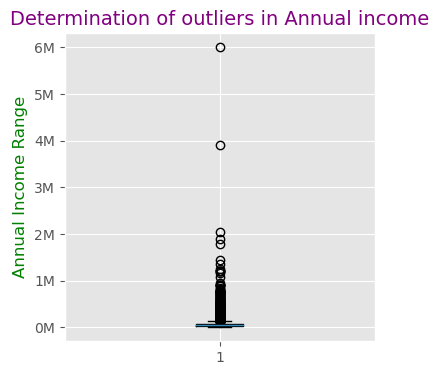

In [41]:
plt.figure(figsize=(4,4))
plt.title('Determination of outliers in Annual income',fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})

plt.ylabel("Annual Income Range", fontdict={'fontsize':12,'fontweight':5,'color':'Green'})

#ticks for annual income range in Million
ticks = np.arange(0,7000000,1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)

plt.boxplot(inp2['annual_inc'])

plt.show()

In [42]:
inp2.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

**Observations**<br>
Majority of the data set on annual income is within 150,000. Clearly there are outliers after 150,000. <br>

**Action**<br>
Determine how many rows belong to the outliers and decide whether to drop them.

In [43]:
#store data in a dataset to figure out whether to drop them; also later on during EDA to check if they get high loans
inp3 = inp2[inp2['annual_inc'] >= 150000]

In [44]:
inp3['loan_status'].value_counts()

Fully Paid     1520
Charged Off     189
Name: loan_status, dtype: int64

**Observation**<br>
Majority of the applicants are Fully Paid. Based on this dataset, applicants who have higher annual income tend to 
fully pay off their loans.<br>
**Action**<br>
Remove these outliers to focus on where majority of the applicant's annual income lie within.

In [45]:
inp4 = inp2[~(inp2['annual_inc'] >= 150000)]
inp4.shape

(36868, 19)

In [46]:
inp4['annual_inc'].describe()

count     36868.000000
mean      61342.057632
std       28392.630881
min        4000.000000
25%       40000.000000
50%       56000.020000
75%       78000.000000
max      149981.000000
Name: annual_inc, dtype: float64

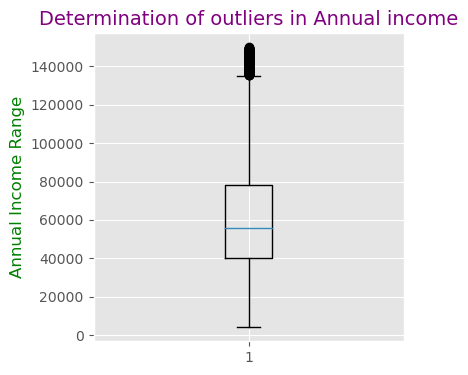

In [47]:
#plot the boxplot again
plt.figure(figsize=(4,4))
plt.title('Determination of outliers in Annual income',fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})
plt.ylabel("Annual Income Range", fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.boxplot(inp4['annual_inc'])
plt.show()

In [48]:
#creating main buckets for currency USD
inp4['annual_inc_bins'] = pd.qcut(inp4['annual_inc'],[0,0.2,0.4,0.6,0.8,1],
                                      ['Very Poor','Poor','Middle','Rich','Very Rich'])

In [49]:
inp4.annual_inc_bins.unique()

['Very Poor', 'Poor', 'Rich', 'Very Rich', 'Middle']
Categories (5, object): ['Very Poor' < 'Poor' < 'Middle' < 'Rich' < 'Very Rich']

**8. loan amounts       : create buckets using reference of annual_inc buc**

Create bins for loan_amnt, funded_amnt & funded_amnt_inv as follows:<br>
1. 0-2,000 : Very Low loan amount<br>
2. 2,000-5,000 : Low loan amount<br>
3. 5,000-10,000 : Medium loan amount<br>
4. 10,000-25,000 : High<br>
5. 25,000-40,000 : Very High

In [50]:
#since the loan amounts are caparable, same bins can be used for all 3 of them
loan_bins = [0,2000,5000,10000,25000,40000]
loan_bin_labels = ['Very Low', 'Low','Medium','High','Very High']

inp4['loan_amnt_bins'] = pd.cut(inp4['loan_amnt'],loan_bins,labels= loan_bin_labels)
inp4['funded_amnt_bins'] = pd.cut(inp4['funded_amnt'],loan_bins,labels= loan_bin_labels) 
inp4['funded_amnt_inv_bins'] = pd.cut(inp4['funded_amnt_inv'],loan_bins,labels= loan_bin_labels) 

**9. emp_length : determine NaN values and note how to replace them, convert to int value & create bins**

In [51]:
inp4['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [52]:
#find the total number of null values in column emp_length
inp4['emp_length'].isnull().sum()

1016

In [53]:
inp4.shape

(36868, 23)

In [54]:
#remove all the rows with null values in column emp_length
inp4 = inp4[~(inp4['emp_length'].isnull())]

In [55]:
inp4.shape

(35852, 23)

In [56]:
inp4['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [57]:
#convert to numeric column having values between 0 and 10
#0 represents employess having experience less than 1 year and 10 represents employees with experience 10 or more.
inp4['emp_length']= inp4["emp_length"].str.replace("< 1", "0")
inp4['emp_length']=inp4["emp_length"].str.extract('(\d+)')
inp4['emp_length'] = inp4['emp_length'].apply(lambda x : int(x))
inp4['emp_length'].dtype

dtype('int64')

In [58]:
#remove all o
inp4.home_ownership.value_counts()

RENT        17678
MORTGAGE    15417
OWN          2661
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

**Observation**<br>
Imputation on emp_length can be done using mode of this column. However, for purposes of data analysis, these rows have 
been dropped. 
Similar observation can be seen with column home_ownership where the rows with None can be replaced with mode of the column. 
Since there are only 3 rows with NONE value, it does not make much of a difference to remove them. Therefore the rows have
not been removed for the purposes of data analysis.

**10. Assumption : Valid loans are those that have been funded by the investor. Therefore loans for which have the investor
has not given a loan will be considered as rejected.**

In [59]:
#remove all rows where the investor has not funded any amount
inp4 = inp4[~( inp4.funded_amnt_inv == 0 )]
inp4.shape

(35706, 23)

**11. loan_status : new column with numeric counterparts for the string values**

In [60]:
#Fully Paid = 1; Charged off = 0
inp4['loan_status_num'] = inp4.loan_status.apply(lambda x : 1 if x == 'Fully Paid' else 0 )

**12. term : new column with numeric counterparts for the string values**

In [61]:
#36 months = 0; 60 months = 1
inp4['term_num'] = inp4.term.apply(lambda x : 0 if x == '36 months' else 1)

**Observation**<br>
Rows containing NaN values in column emp_length have been dropped since imputation is not allowed in this case study.
However, if imputation was allowed, then such NaN values can be replaced by the MODE of the column 'emp_length'

In [62]:
print("NaN present in dataset:\n", inp4.isna().sum())
print("Null present in dataset:\n", inp4.isnull().sum())

NaN present in dataset:
 loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
int_rate_bins           0
Month                   0
Year                    0
ratioFINV               0
annual_inc_bins         0
loan_amnt_bins          0
funded_amnt_bins        0
funded_amnt_inv_bins    0
loan_status_num         0
term_num                0
dtype: int64
Null present in dataset:
 loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0


In [63]:
inp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35706 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35706 non-null  int64   
 1   funded_amnt           35706 non-null  int64   
 2   funded_amnt_inv       35706 non-null  int64   
 3   term                  35706 non-null  object  
 4   int_rate              35706 non-null  float64 
 5   grade                 35706 non-null  object  
 6   sub_grade             35706 non-null  int64   
 7   emp_length            35706 non-null  int64   
 8   home_ownership        35706 non-null  object  
 9   annual_inc            35706 non-null  float64 
 10  verification_status   35706 non-null  object  
 11  loan_status           35706 non-null  object  
 12  purpose               35706 non-null  object  
 13  addr_state            35706 non-null  object  
 14  dti                   35706 non-null  float64 
 15  in

**Observation**<br>
No Null or NaN values present in any column. All data cleaning and manipulation is now complete. 

## Exploratory Data Analysis

Analysis on:<br>
1. Univariate analysis<br>
2. Segmented univariate analysis-ordered & unordered variables<br>
3. Bivariate analysis<br>
4. Derived metrics analysis

In [64]:
#inp4 : main dataset(after data cleaning & manipulation); inp5 = Charged off dataset from inp4.
#data set for Charged off 
inp5 = inp4[inp4.loan_status == 'Charged Off']

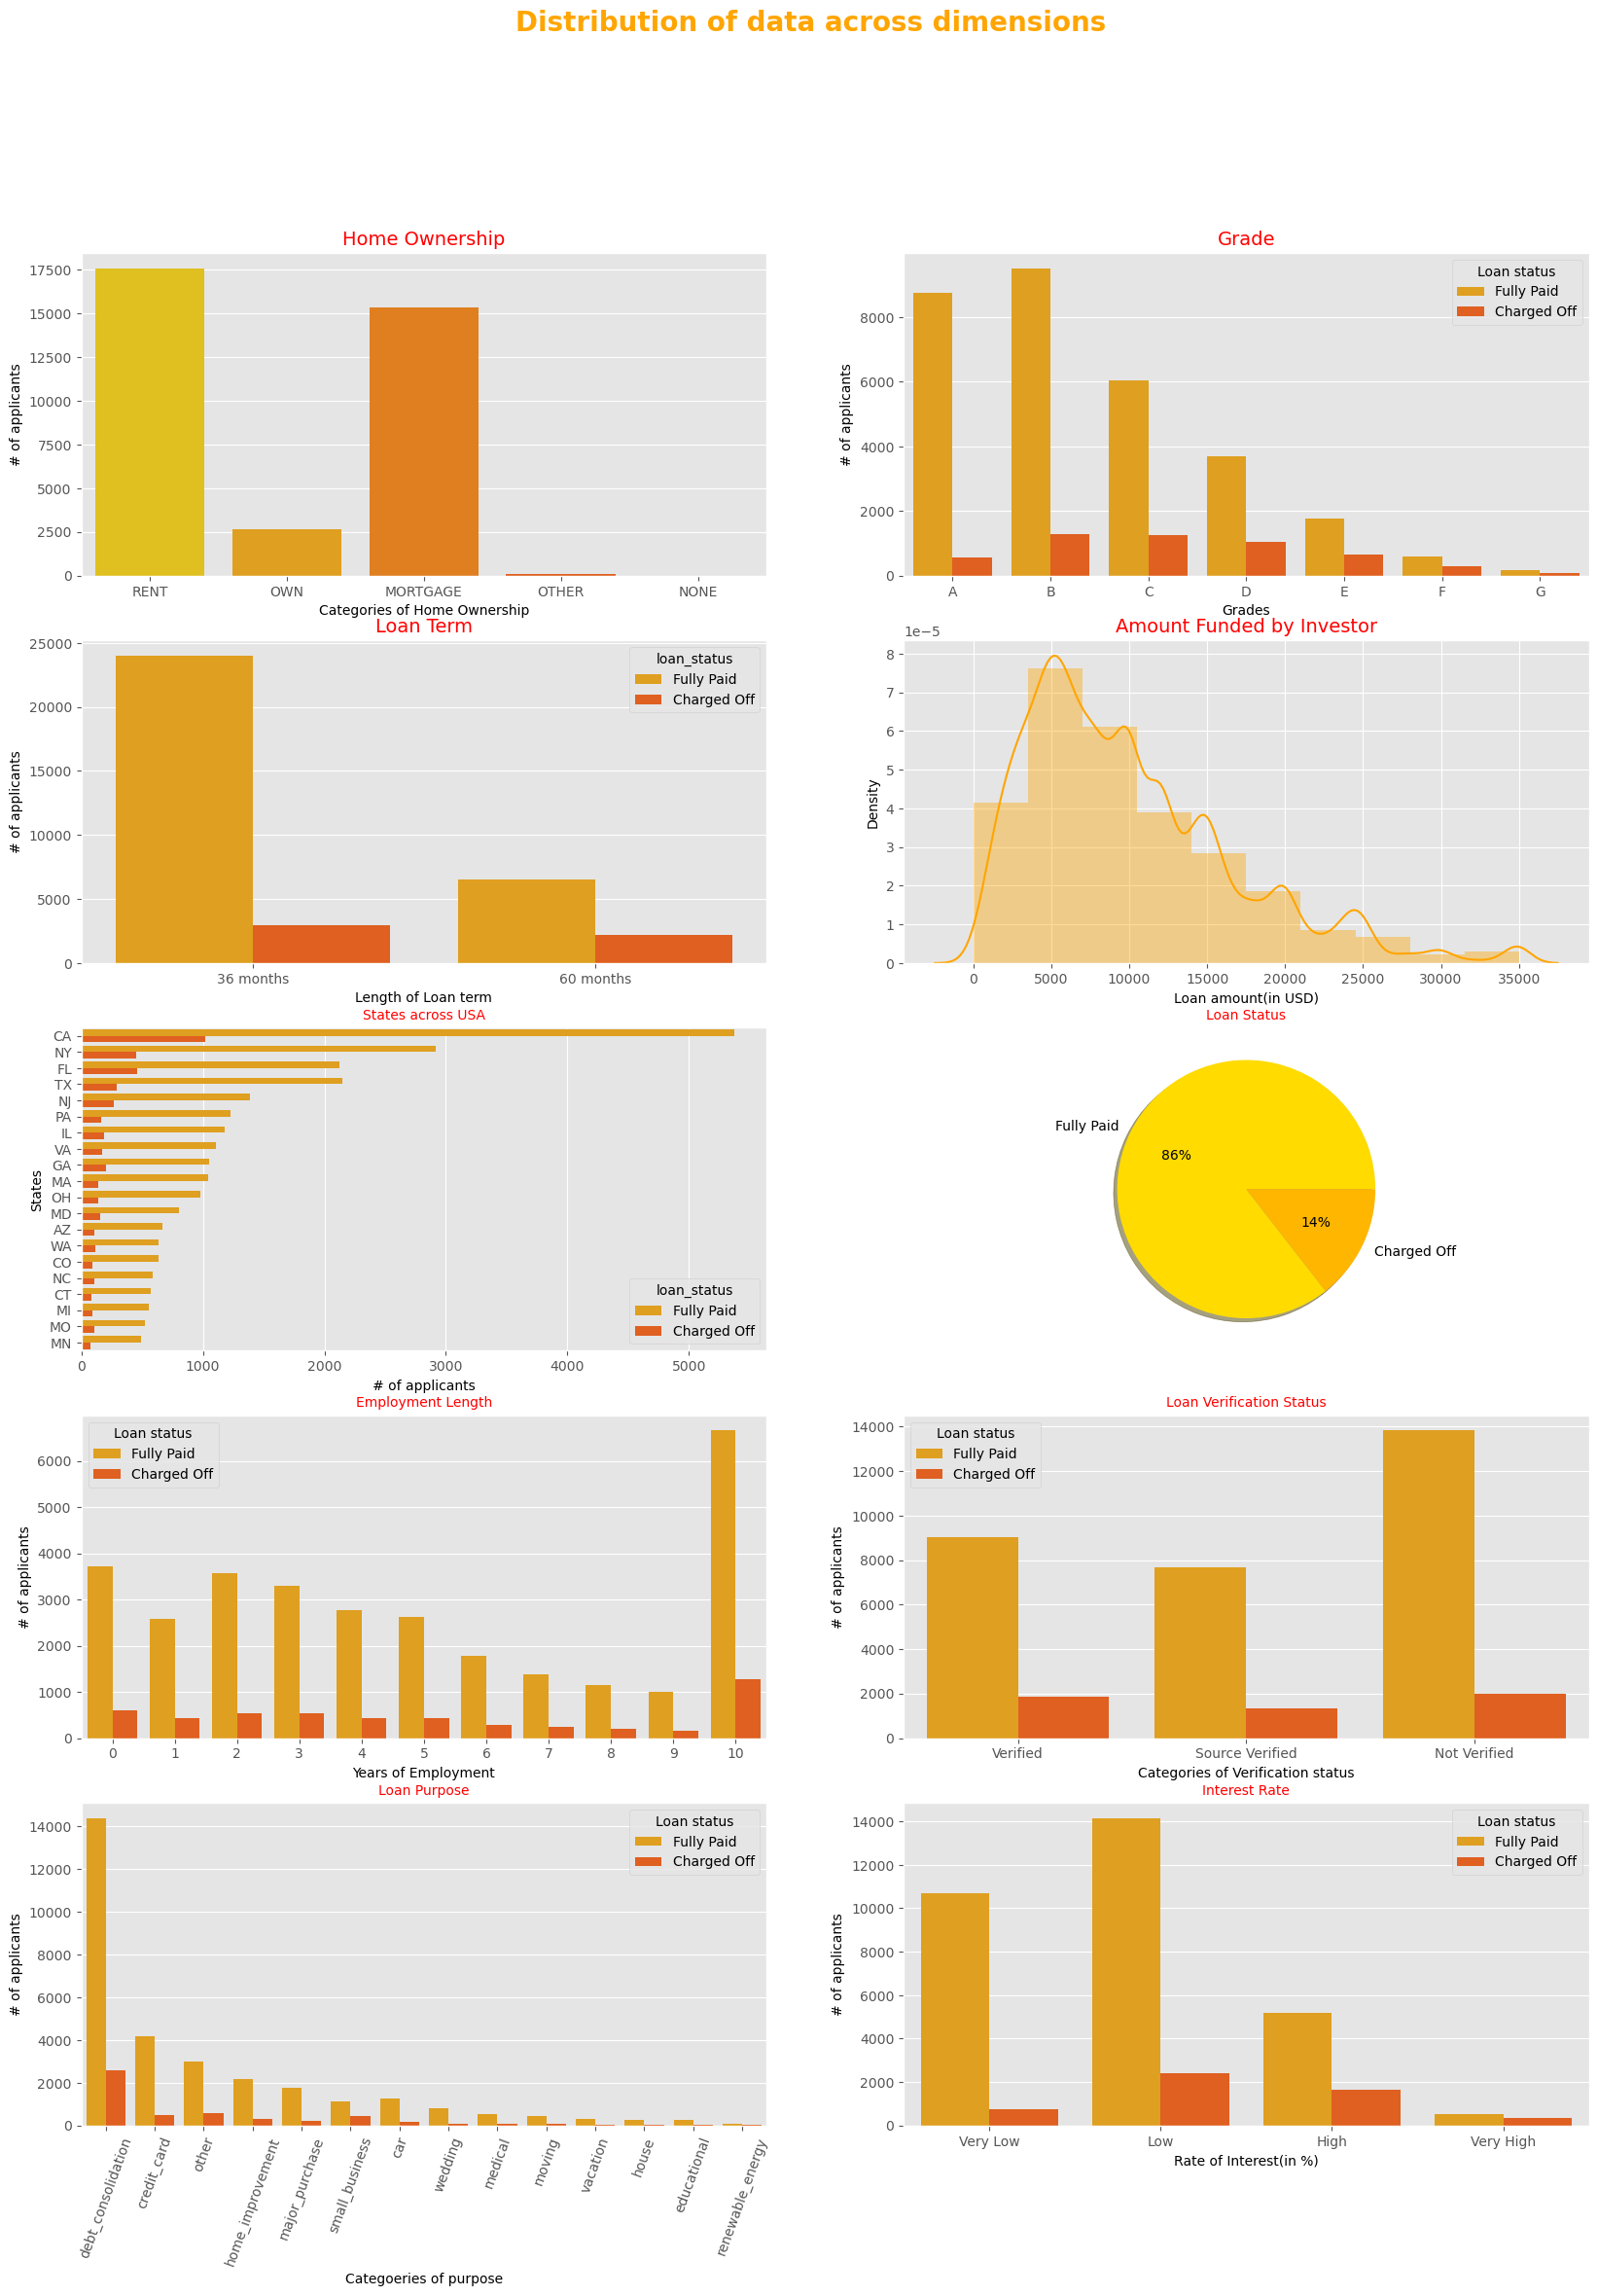

In [65]:
#subplots for the univariate analysis
plt.figure(figsize=(20,25))

plt.subplot(5,2,1)
plt.title('Home Ownership',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='home_ownership',palette='autumn_r')
plt.xlabel("Categories of Home Ownership")
plt.ylabel("# of applicants")

plt.subplot(5,2,2)
plt.title('Grade',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='grade',order=['A','B','C','D','E','F','G'], hue='loan_status', palette="autumn_r")
plt.xlabel("Grades")
plt.legend(title='Loan status')
plt.ylabel("# of applicants")

plt.subplot(5,2,3)
plt.title('Loan Term',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='term',order=['36 months','60 months'], hue = 'loan_status', palette="autumn_r")
plt.xlabel("Length of Loan term")
plt.ylabel("# of applicants")

plt.subplot(5,2,4)
plt.title('Amount Funded by Investor',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.distplot(inp4['funded_amnt_inv'],bins=10,color='orange')
plt.xlabel("Loan amount(in USD)")

plt.subplot(5,2,5)
plt.title('States across USA',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.countplot(y=str('addr_state'), data=inp4, orient="h", hue='loan_status',order=inp4.addr_state.value_counts().iloc[:20].index ,palette = "autumn_r")
plt.xlabel("# of applicants")
plt.ylabel("States")

plt.subplot(5,2,6)
plt.title('Loan Status',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
colors = sns.color_palette('autumn_r')
plt.pie(inp4['loan_status'].value_counts(),colors=colors,labels =['Fully Paid', 'Charged Off'], autopct = '%.0f%%', shadow = True)

plt.subplot(5,2,7)
plt.title('Employment Length',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x=inp4['emp_length'], hue='loan_status', palette = "autumn_r")
plt.xlabel("Years of Employment")
plt.ylabel("# of applicants")
plt.legend(title='Loan status')

plt.subplot(5,2,8)
plt.title('Loan Verification Status',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x=inp4['verification_status'], hue='loan_status', palette = "autumn_r")
plt.xlabel("Categories of Verification status")
plt.ylabel("# of applicants")
plt.legend(title='Loan status')

plt.subplot(5,2,9)
plt.title('Loan Purpose',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.countplot(data = inp4,x='purpose',order=inp4.purpose.value_counts().index,hue='loan_status', palette = "autumn_r")
plt.xticks(rotation=70)
plt.xlabel("Categoeries of purpose")
plt.ylabel("# of applicants")
plt.legend(title='Loan status')

plt.subplot(5,2,10)
plt.title('Interest Rate',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x=inp4['int_rate_bins'], hue='loan_status', palette = "autumn_r")
plt.xlabel("Rate of Interest(in %)")
plt.ylabel("# of applicants")
plt.legend(title='Loan status')

plt.suptitle('Distribution of data across dimensions',fontsize=20,color='Orange',weight='bold')
plt.show()

**Observations on:**<br>
**1. home_ownership**<br>
A large number of loan applicants were on Rent or were paying Mortgage on their houses implying that many applications in the future would come from such profiles. Candidates who own their houses do not generally apply for loans that frequently. For some candidates, the status of their residence could not be determined but since the data is negligible, they can be ignored. <br>
**2. grade**<br>
Majority of the loans belonged to the grades B and A in order. <br>
**3. term**<br>
Majority of the applicants opted for 36 months duration of the loan.<br>
**4. funded_amnt_inv**<br>
Majority of the loans funded by the investor is around 5000.<br>
**5. addr_state**<br>
CA state has the highest number of loan applicants and also with maximum number of charged offs followed by NY and FL.<br>
**6. loan_status**<br>
85% of the applicants paid the loan amount fully and 15% were defaulters.<br>
**7. emp_length**<br>
Maximum charged off loans are for those having experience more than 10 years.
Also, it is seen that applicants with more than 10 years of experience also have a high number of fully paid loans.<br>
**8. verification_status**<br>
Not much insights can be drawn as the count of charged off loans is same across three different loan verification status.<br>
**9. purpose**<br>
Majority of loans were taken for the purpose of debt consolidation, then the number is high for credit card loans and loans taken to do home improvements & major purchases.<br>
**10. int_rate_bins**<br> 
As rate of interest had large distribution of values betweeen 5 and 25, univariate analysis is performed on four buckets.
Very few applicants had applied for loan with very high rate of interest and the proportion of charged off's is maximum. For very low and low rate of interest, proportion of charged off's is lesser.

**Observations based on columns home_ownership, grade, term and funded_amnt_inv together**<br>
A large majority of applicants are those whose funds were funded by investors for smaller loan amounts(around 5,000) and
live on Rent or have Mortgages with loan applications with grades A or B and with a term of 36 months.

**11. Comparison across types of loan amounts and its bins**

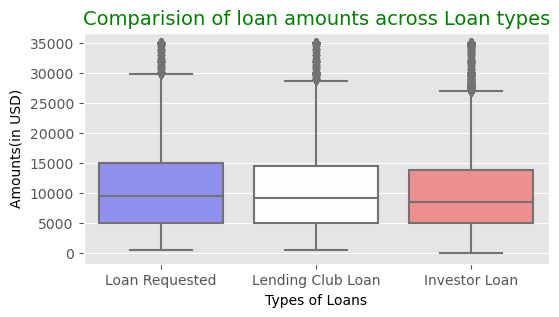

In [66]:
plt.figure(figsize=(6,3))
plt.title("Comparision of loan amounts across Loan types",fontdict={'fontsize':14,'fontweight':5,'color':'Green'})
sns.boxplot([inp4.loan_amnt,inp4.funded_amnt, inp4.funded_amnt_inv], palette='bwr')
plt.xlabel("Types of Loans")
plt.ylabel("Amounts(in USD)")
plt.xticks((0,1,2),['Loan Requested','Lending Club Loan','Investor Loan'])
plt.show()

**Observation**<br>
While there are more outliers for column Investor loan as compared to the other two, they can be ignored since the box plot
is well defined.<br>
As observed from the boxplot, the median of the investor loan is lower than both of the other categories which implies that
even though Lending club tends to match the loan requested from the borrower, the investor most likely prefers to a sanction
a fractional amount of the loan requested. <br>

**Action**<br>
Plot boxplots across the bins of the loan amounts of requested loan amount and loans sanctioned by the investor for comparision.
Loan funded by Lending Club has been ignored for this analysis since it is similar to the loan requested by the borrower.

In [67]:
#boxplot of requested loan amount
inp4.groupby(by=['loan_amnt_bins'])['loan_amnt'].count()

loan_amnt_bins
Very Low      1554
Low           7333
Medium       12042
High         13652
Very High     1125
Name: loan_amnt, dtype: int64

In [68]:
#boxplot of investor loans
inp4.groupby(by=['funded_amnt_inv_bins'])['funded_amnt_inv'].count()

funded_amnt_inv_bins
Very Low      2227
Low           7733
Medium       12068
High         12743
Very High      935
Name: funded_amnt_inv, dtype: int64

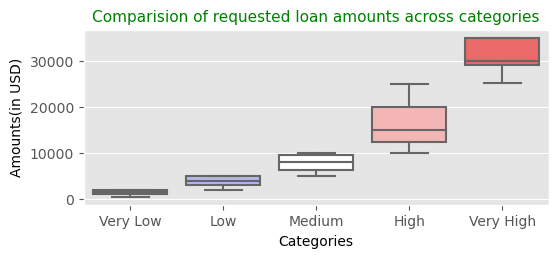

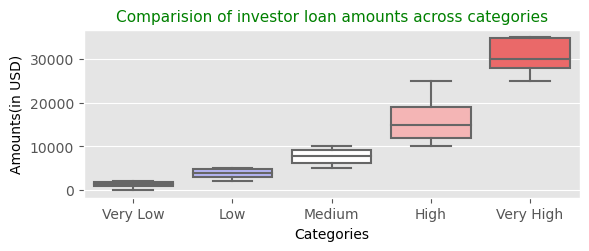

In [69]:
plt.figure(figsize=(6,5))

plt.subplot(2,1,1)
plt.title("Comparision of requested loan amounts across categories",fontdict={'fontsize':11,'fontweight':5,'color':'Green'})
sns.boxplot(inp4, x=inp4.loan_amnt_bins, y =inp4.loan_amnt, palette='bwr')
plt.xlabel("Categories")
plt.ylabel("Amounts(in USD)")
plt.show()

plt.subplot(2,1,2)
plt.title("Comparision of investor loan amounts across categories",fontdict={'fontsize':11,'fontweight':5,'color':'Green'})
sns.boxplot(inp4, x=inp4.funded_amnt_inv_bins, y =inp4.funded_amnt_inv, palette='bwr')
plt.xlabel("Categories")
plt.ylabel("Amounts(in USD)")
plt.show()

In [137]:
#Charged off : percentile of ratio of investor funded loan
inp5.ratioFINV.quantile([0,0.1,0.2,0.25,0.5,0.75,0.9])

0.00      0.20
0.10     92.50
0.20     97.92
0.25     98.66
0.50    100.00
0.75    100.00
0.90    100.00
Name: ratioFINV, dtype: float64

**Observations**<br>
1.In general, borrowers tend to  request for higher loan amounts(USD 10,000-25,000), however the investor tends to sanction lower
loans which is seen by looking at the sizes of box plots across all categories and seen prominently for categories High & 
Very High. However the median of these 2 categories are very close.

2. Almost of the requested loans from the defaulted borrower are matched up with the loans funded by the investor.<br>

**Action**<br>
To confirm the above observation, plot a histogram on ratioFINV which is ratio of the amount funded by the lending club(which
is interchangable with requested amount due to very small difference) and amount sanctioned by the investor.

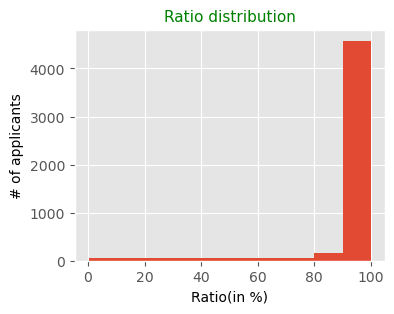

In [70]:
#Charged off : univariate analysis on data dervied metric 
plt.figure(figsize=(4,3))
plt.title('Ratio distribution',fontdict={'fontsize':11,'fontweight':5,'color':'Green'})
plt.hist(inp5.ratioFINV)
plt.xlabel('Ratio(in %)')
plt.ylabel('# of applicants')
plt.show()

**Observation**<br>
Almost of the applicants had their requested loans santioned almost to their requested amounts upto very small fractional
differences. 

**Conclusion**<br>
Investors almost always santion the requested loans amounts from the borrowers at a small fractional difference, however
there are minute cases where the fractional difference is high.

**Action**<br>
Compare these fractional differences against other dimensions such as loan status and annual income.

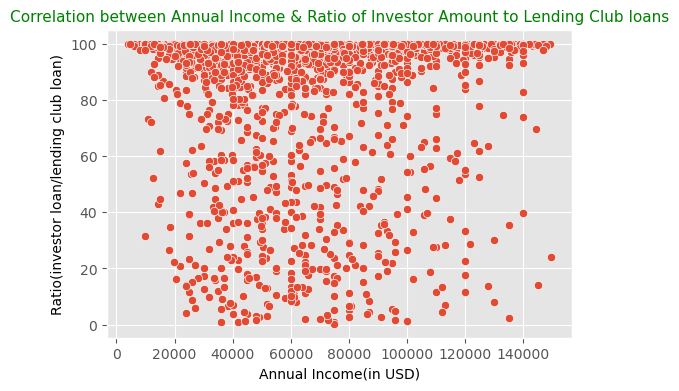

In [71]:
#Charged off 
plt.figure(figsize=(6,4))
plt.title('Correlation between Annual Income & Ratio of Investor Amount to Lending Club loans',
          fontdict={'fontsize':11,'fontweight':5,'color':'Green'})
sns.scatterplot(x=inp5['annual_inc'],y=inp4['ratioFINV'] )
plt.xlabel('Annual Income(in USD)')
plt.ylabel('Ratio(investor loan/lending club loan)')
plt.show()

**Observation**<br>
Across all annual income data for charged off applicants, the investor tend to sanction the loans at a higher ratio of 80% & 
above & strongly approves 100% for many applicants. However, there is no other pattern that is visible for lower ratios. <br>

**Conclusion**<br>
The differences between the requested loan, lending club determined loans & investor loans and annual income plays no role
in determining whether the borrower will default or the sanctioned loan amount. However, borrowers tend to request for higher loan amounts (USD 10,000-25,000) for which majority of the investor sanctioned loans are within USD 6,000 and USD 9,000. 

**12. Analysis of distrbution of annual income across its classification with loan status(business driven metric)**

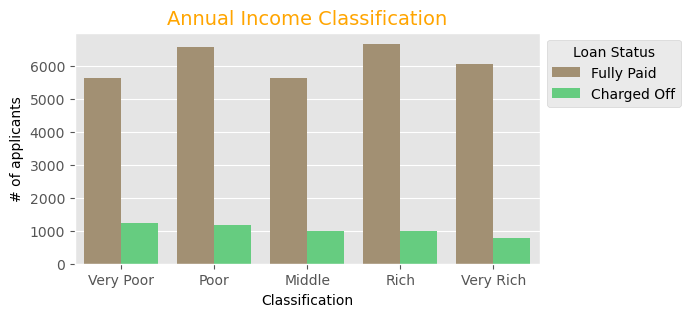

In [72]:
plt.figure(figsize=(6,3))
plt.title('Annual Income Classification',fontdict={'fontsize':14,'fontweight':5,'color':'Orange'})
sns.countplot(data=inp4, x='annual_inc_bins',order=['Very Poor','Poor','Middle','Rich','Very Rich'], 
                  hue='loan_status', palette="terrain_r")
plt.xlabel("Classification")
plt.ylabel("# of applicants")
plt.legend(title='Loan Status',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
There is a very large difference between different loan statuses across all income classifications.<br>

High number of defaulted(charged off) loans belong to those form the Very Poor or Poor income families. It is surprising
to note that those with very high income also have measureable defaulted loans which implies that most likely they have
unhealthy financial habits.<br>

Generally, it is noted that those who belong to the Rich or Poor classifications tend to fully pay their loans even though
there are applicants in both categories with measurable defaulted loans.

**Action**<br>
1. Compare annual income with interest rate
2. Compare Annual income classfication with term.
3. Compare term with interest rate.
4. Compare annual income , interest rate & Grade

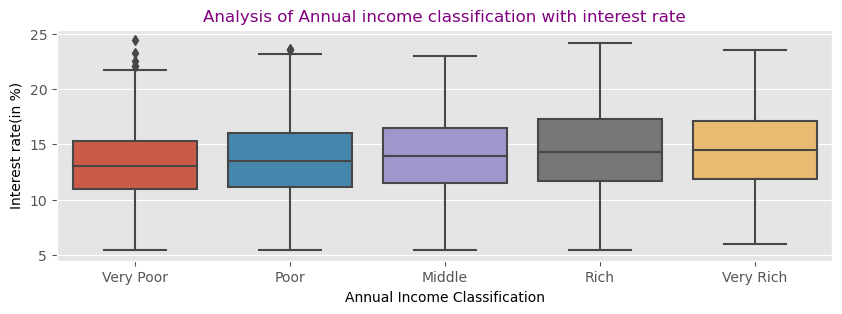

In [73]:
#Charged off : comparison of annual income bin with interet rate
plt.figure(figsize=(10,3))
plt.title('Analysis of Annual income classification with interest rate',fontdict={'fontsize':12,'fontweight':5,
                                                                                 'color':'Purple'})
sns.boxplot(inp5, x=inp5.annual_inc_bins, y=inp5.int_rate)
plt.xlabel('Annual Income Classification')
plt.ylabel('Interest rate(in %)')
plt.show()

**Observation**<br>
1. There is a slight increasing trend of median interest rate for all income classification which lies between 13% to 15% 
interest rate.
2. There are outliers for Very Poor applicants who have very high interest rates above 21%.

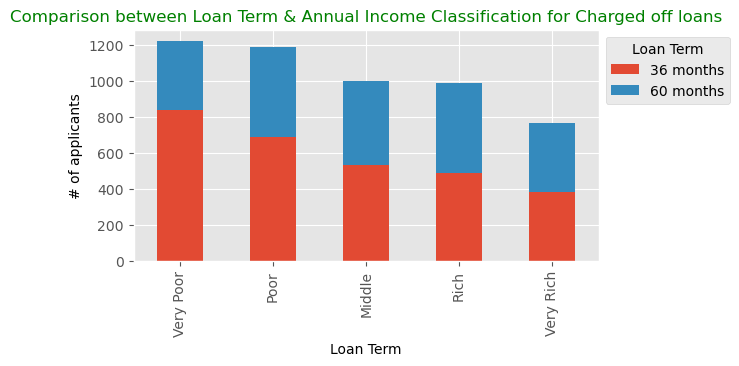

In [74]:
#Charged off : Compare Annual income classfication with term
inp5.pivot_table(index = "annual_inc_bins",columns="term",values="annual_inc", 
                  aggfunc='count' ).plot(kind='bar',stacked=True,figsize=[6,3])
   
plt.legend(title='Loan Term',loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Comparison between Loan Term & Annual Income Classification for Charged off loans',
          fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.ylabel("# of applicants")
plt.xlabel("Loan Term")
plt.show()

**Observation**<br>
1. Defaulted applicants have a loan term of 36 months on a much higher side for Very Poor & Poor income classifications.
2. Middle applicants have almost same ratio between the different loan terms.
3. Rich & Very Rich applicants have slightly larger defaulters with a 60 months loan term.

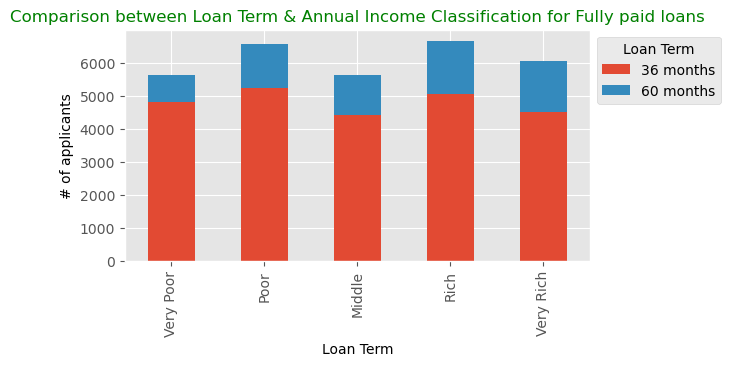

In [75]:
#Fully Paid : Compare Annual income classfication with term
inp4[inp4.loan_status == 'Fully Paid'].pivot_table(index = "annual_inc_bins",columns="term",values="annual_inc", 
                  aggfunc='count' ).plot(kind='bar',stacked=True,figsize=[6,3])
   
plt.legend(title='Loan Term',loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Comparison between Loan Term & Annual Income Classification for Fully paid loans',
          fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.ylabel("# of applicants")
plt.xlabel("Loan Term")
plt.show()

**Observation**<br>
1. Across all income classifications, applicants with loan terms of 36 months have the highest majority which implies that
applicants pay off loans quicker in shorter loan terms.
2. Rich & Very High applicants have significant more loans with tenure of 60 months in comparison to rest, with Very poor
applicants having the least.

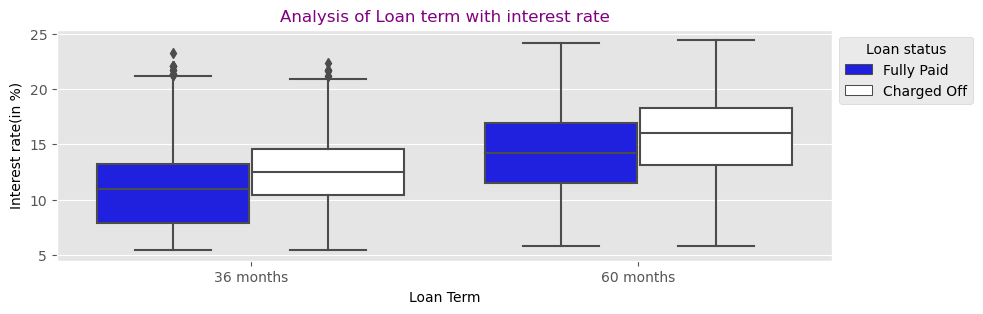

In [76]:
#Compare term with interest rate
plt.figure(figsize=(10,3))
plt.title('Analysis of Loan term with interest rate',fontdict={'fontsize':12,'fontweight':5,'color':'Purple'})
sns.boxplot(inp4, x=inp4.term, y=inp4.int_rate,hue=inp4.loan_status, palette='flag_r')
plt.xlabel('Loan Term')
plt.ylabel('Interest rate(in %)')
plt.legend(title='Loan status',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
1. There is a significant difference in the median interest rates between defaulters and non-defaulted applicants in both 
types of loan terms.
2. Applicants with higher interest rate in either loan terms tend to default which is around 13% for loan term of 36 months
& 16% for loan term of 60 months.
3. Loan terms of 60 months have on general much higher interest rates compared to loan terms of 36 months which may imply
that those who opt for loan term of 60 months may most likely tend to default.

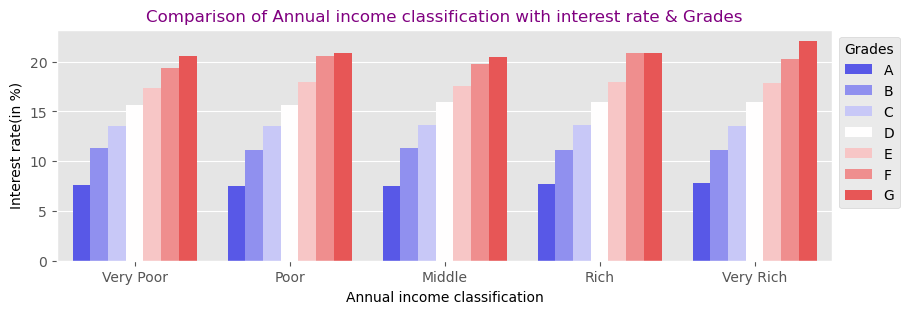

In [77]:
#Charged off: Compare annual income , interest rate & Grade
plt.figure(figsize=(10,3))
plt.title('Comparison of Annual income classification with interest rate & Grades',
          fontdict={'fontsize':12,'fontweight':5,'color':'Purple'})

sns.barplot(data=inp5, x='annual_inc_bins',y='int_rate',hue='grade',hue_order=['A','B','C','D','E','F','G'],
            palette='bwr',ci=0,estimator=np.median )  
plt.legend(title='Grades',loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Annual income classification')
plt.ylabel('Interest rate(in %)')
plt.show()

**Observation**<br>
1. For all income classification & grade level, the interest rate steadily increases consistently across all grades. Therefore,
the behaviour is consistent across all groups for defaulted applicants.
2. The Very Rich defaulted applicants have the highest interest rate which is above 20% for grade G followed by the Rich defaulted applicants with both grades F & G. 
3. Very Poor & Poor defaulted applicants have an interest rate above 20% for grade G.
4. Lowest interest rate for all income classifications is seen only for grade A.

**13. segment on grades & loan status, analysis on mean of loan amounts funded by investors & annual income bins**

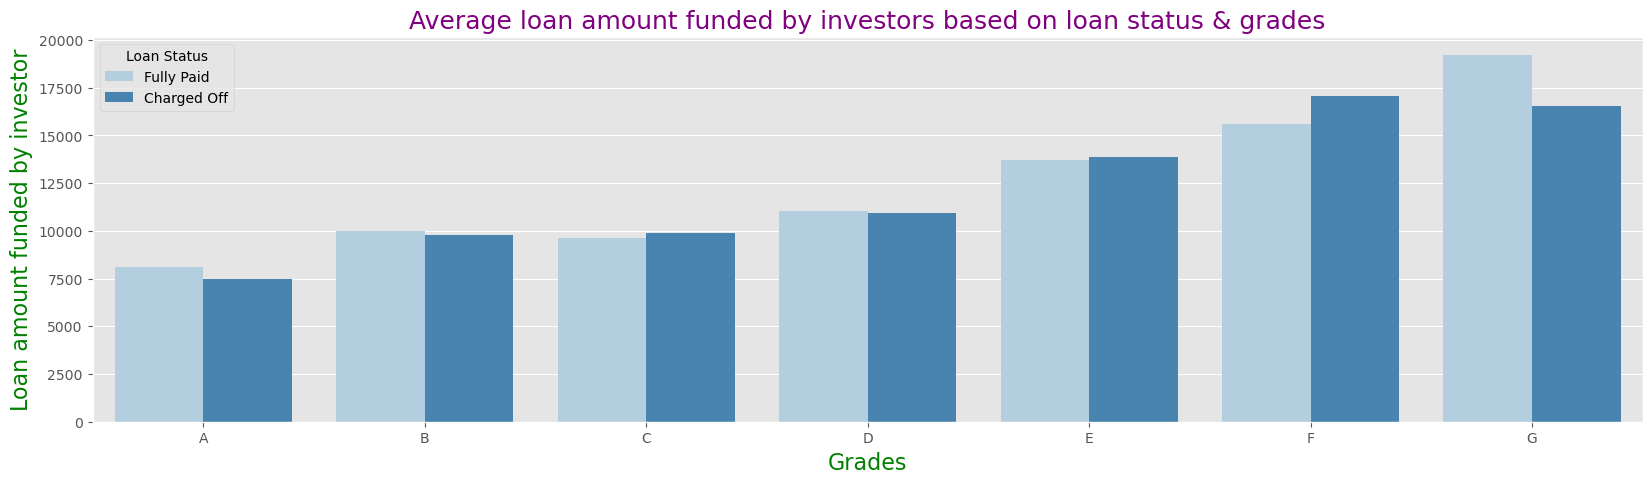

In [78]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status & grades",fontdict={'fontsize':18,'fontweight':5,
                                                                                 'color':'Purple'})
sns.barplot(data=inp4, x='grade',order=['A','B','C','D','E','F','G'],y='funded_amnt_inv',hue='loan_status',
            palette='Blues',ci=0 )           

plt.ylabel("Loan amount funded by investor",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Grades",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

In [79]:
inp5.groupby(by=['grade'])['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,548.0,7454.021898,4598.717295,52.0,4000.0,6652.0,9950.00,30000.0
B,1296.0,9787.889660,6649.611534,74.0,4900.0,8108.5,13731.25,35000.0
C,1252.0,9893.331470,7059.953779,174.0,4587.5,8000.0,14350.50,35000.0
D,1041.0,10939.697406,7236.258214,124.0,5000.0,9700.0,15050.00,35000.0
E,649.0,13867.429892,8332.421227,224.0,7099.0,12700.0,18975.00,35000.0
F,285.0,17042.989474,8492.116755,550.0,10350.0,16000.0,22975.00,35000.0
G,95.0,16527.631579,9199.536270,2500.0,8243.0,15000.0,22200.00,35000.0


**Observation**<br>
There are charged off loans across all grades with the average of the sanctioned loan amount increasing steadily across the grades increasing risk level.

The highest loan amounts are in riskiest **grades F and G** for which investor funded loans fall in the **high bin**(USD 10,000-25,000) yet the number of defaulted loans is less compared to the rest of the grades. It appears that loans with higher risks(E,F,G) have a majority of them invested loans in the higher bin. The lower grades have a majority of loan amounts in the medium bin(USD 5,000-10,000) yet the number of defaulted loans are the highest for grades B and C.<br>

**Conclusion**<br>

1. Generally applicants whose loans have grades B,C & D have highest defaulted loans with median sanctioned loan amounts by the investor fall in the medium bin(USD 5,000-10,000) which would form a huge chunk of credit loss for the company.<br>

2. However, loans with riskier grades E,F,G have a high median sanctioned loan from the investor, yet the number of defaults are
lesser in comparison to those in all of the lower less riskier grades. Since the sanctioned loan amounts are high, the company 
maybe advised to sanction lower loan amounts for riskier grades.<br>

**Action**<br>
1. Comparison of grades with annual income bins in relation to above conclusion.<br>
2. Plot to see how sub-grades are assigned to each grade to find impact of above conclusion.<br>
3. Comparison of grade against interest rates.

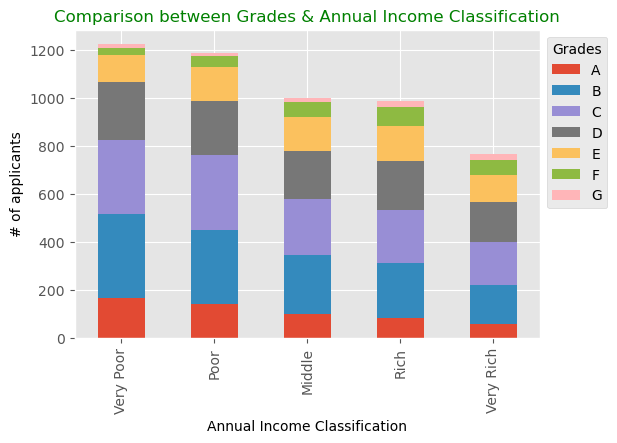

In [80]:
#Comparison of grades with annual income bins in relation to above conclusion with status Charged Off
inp5.pivot_table(index = "annual_inc_bins",columns="grade",values="annual_inc", 
                 aggfunc='count' ).plot(kind='bar',stacked=True,figsize=[6,4])
plt.legend(title='Grades',loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Comparison between Grades & Annual Income Classification',
              fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.ylabel("# of applicants")
plt.xlabel("Annual Income Classification")
plt.show()

**Observation**<br>
1. All defaulted applicants have loans across all grades with the total being least for Very Rich applicants and
highest for Very Poor applicants.<br>
2. Very Rich defaulted applicants tend to receive loans with grades C and lowest with grade A.<br>
3. Rich defaulted applicants have the highest number of loans with grade F in comparison with other income classifications.<br>
4. Middle income defaulted applicants receive loans with grades almost similar in proportion with the remaining incomes.<br>
5. Poor income defaulted applicants tend to receive loans with grades mostly in B & C.<br>
6. Very poor income defaulted applicants have similar characteristics to Poor income defaulted applicants in proportion 
except for grade F which it has the least.

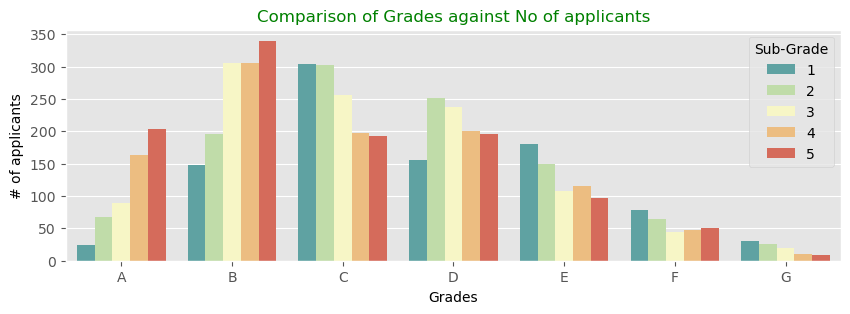

In [81]:
#Plot to see how sub-grades are assigned to each grade to find impact of above conclusion
plt.figure(figsize=(10,3))
plt.title('Comparison of Grades against No of applicants',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
sns.countplot(data=inp5, x='grade',hue='sub_grade', order=['A','B','C','D','E','F','G'], palette='Spectral_r')
plt.xlabel('Grades')
plt.ylabel('# of applicants')
plt.legend(title='Sub-Grade')
plt.show()

**Observation**<br>
On comparing grades & sub-grades for defaulted applicants:<br>
1. Sub-grade B5 has the highest number of defaulters followed by B3, B4, C1 & C2. 
2. The next highest peaks are seen for C3, D2 & D3. 
3. The lowest peaks are seen within all sub-grades of G  followed by F and then A1. 

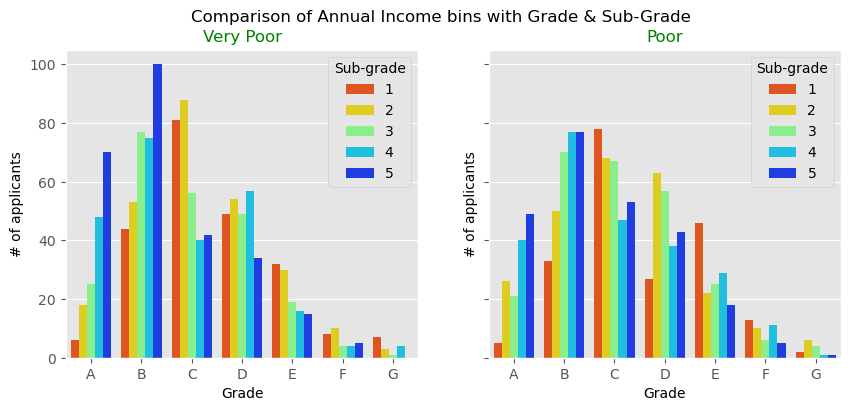

In [82]:
#Charged off : comparison of grades, sub-grade & annual income bins
grades = ['A','B','C','D','E','F','G']

fig, axes = plt.subplots(1, 2,sharex=True, sharey=True ,figsize=(10,4))
fig.suptitle('Comparison of Annual Income bins with Grade & Sub-Grade')

#Very poor income classification
sns.countplot(ax=axes[0],data=inp5[inp5.annual_inc_bins == 'Very Poor'], x='grade',hue='sub_grade', order=grades, 
              palette='jet_r')
axes[0].set_title('Very Poor',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
axes[0].legend(title='Sub-grade')
axes[0].set(xlabel='Grade',ylabel='# of applicants')

#Poor income classification
sns.countplot(data=inp5[inp5.annual_inc_bins == 'Poor'], x='grade',hue='sub_grade', order=grades, palette='jet_r',
             ax=axes[1])
axes[1].set_title('Poor',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
axes[1].legend(title='Sub-grade')
axes[1].set(xlabel='Grade',ylabel='# of applicants')

plt.show()

**Observation**<br>
1. Loan grade B5 is the highest for Very poor income applicants while C1 is for Poor income.
2. Loan grade G4 is the least for Very poor income while G4 & G5 are the least for Poor income.

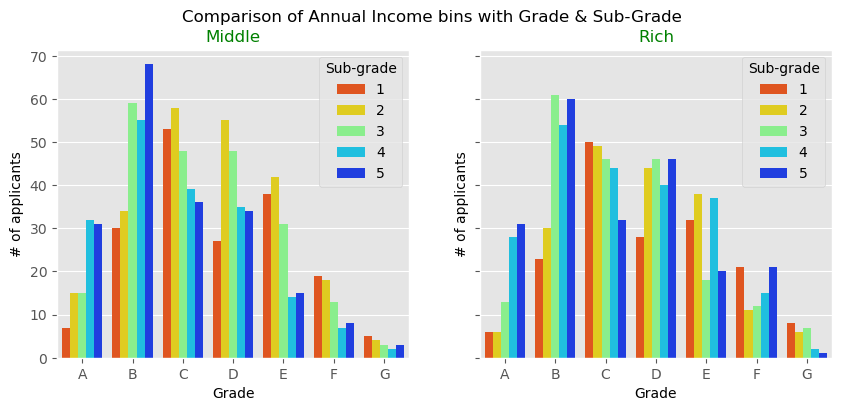

In [83]:
fig, axes = plt.subplots(1, 2,sharex=True, sharey=True ,figsize=(10,4))
fig.suptitle('Comparison of Annual Income bins with Grade & Sub-Grade')

#Middle income classification
sns.countplot(ax=axes[0],data=inp5[inp5.annual_inc_bins == 'Middle'], x='grade',hue='sub_grade', order=grades, 
              palette='jet_r')
axes[0].set_title('Middle',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
axes[0].legend(title='Sub-grade')
axes[0].set(xlabel='Grade',ylabel='# of applicants')

#High income classification
sns.countplot(data=inp5[inp5.annual_inc_bins == 'Rich'], x='grade',hue='sub_grade', order=grades, palette='jet_r',
             ax=axes[1])
axes[1].set_title('Rich',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
axes[1].legend(title='Sub-grade')
axes[1].set(xlabel='Grade',ylabel='# of applicants')

plt.show()

**Observation**<br>
1. Loan grade B5 is highest for Middle income while B3 is highest for Rich income applicants.
2. Loan grade G4 is least for Middle income while G5 is least for Rich income applicants.
3. Loan grade G is highest for Rich income applicants across all income classfications.

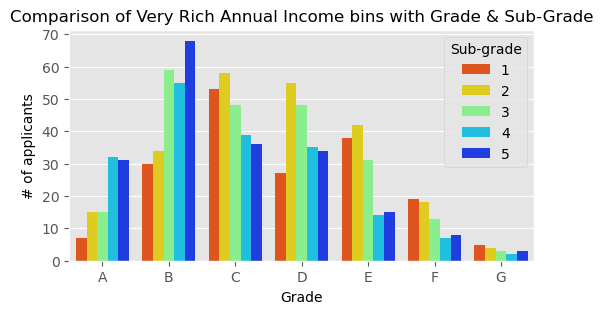

In [84]:
plt.figure(figsize=(6,3))
plt.title('Comparison of Very Rich Annual Income bins with Grade & Sub-Grade',
          fontdict={'fontsize':12,'fontweight':5})

#Very High income classification
sns.countplot(data=inp5[inp5.annual_inc_bins == 'Middle'], x='grade',hue='sub_grade', order=grades, palette='jet_r')
plt.legend(title='Sub-grade')
plt.xlabel('Grade')
plt.ylabel('# of applicants')

plt.show()

**Observation**<br>
1. Loan grade B5 is highest for Very Rich income applicants.
2. Loan grade G4 is least for Very Rich income applicants.

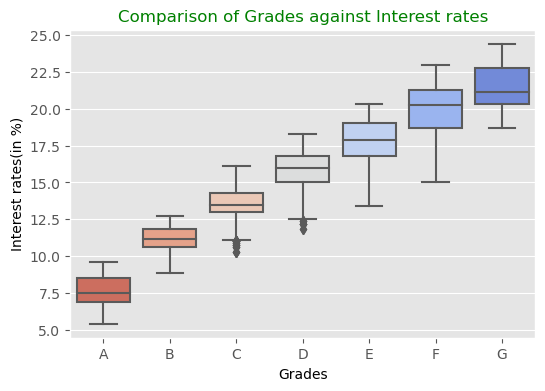

In [85]:
#3. Charged off : Comparison of grade against interest rates.
plt.figure(figsize=(6,4))
plt.title('Comparison of Grades against Interest rates',fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
sns.boxplot(inp5, x=inp5.grade, y=inp5.int_rate, order=['A','B','C','D','E','F','G'],palette='coolwarm_r')
plt.xlabel('Grades')
plt.ylabel('Interest rates(in %)')
plt.show()

In [86]:
#outliers for grade C; find which sub-grades have maximum value
inp5[(inp5.grade=='C') & (inp5.int_rate <11) ]['sub_grade'].value_counts()

1    7
3    3
2    3
Name: sub_grade, dtype: int64

In [87]:
#outliers for grade D; find which sub-grades have maximum value
inp5[(inp5.grade=='D') & (inp5.int_rate <12.5) ]['sub_grade'].value_counts()

1    5
2    5
3    4
Name: sub_grade, dtype: int64

**Observation**<br>
On comparing grades & interest rates for defaulted applicants:<br>
1.There is an increasing trend of interest grade with the increase in the grade risk with the lowest being for grade A and 
highest for grade G. There is a also a wider range of interest rates provided for grades E,F and G.<br>

2.The grades C & D have outliers out of which sub-grade C1,D1 & D2 are the largest 
outliers implying that these sub-grades have lower interest rate and yet the applicant defaulted.<br>

**Conclusion:**<br>

1. Defaulted applicants have good number of loans within grades B(sub-grades B3,B4,B5(highest)), C(sub-grades C1,C2,C3) & D(D2,D3) with the highest falling under the Very poor annual income classification. The median of these loan amount fall in the medium bin(USD 5,000-10,000) of which most applicants would be in Very Poor & Poor annual income classifications 
leading to a large chuck of credit loss for the company.

2. Loan grade F was the highest for Rich income classification, however the number of defaults are low with high median on loan amount implying that rich applicants apply for higher loans and yet default on them even though the number of applicants for this grade are low.

3. Loan grade A was assigned the least to the Very Rich which is interesting since they tend to secure more riskier loans with grades E, F & G and yet default on them even though number of applicants with loan grade F & G(lowest among all sub-grades) are lowest. In comparison with Very poor applicants, the least loan grade was of type F & G implying they tend to avoid defaulting on riskier loans.

4. Income classifications Poor & Very Rich show similar proportional characteristics across all loan grades.

5. Middle income & Rich show similar proportional characteristics except for loan grades F & G which are higher for the Rich.

6. Loan sub-grade A1 has the least number of defaulted applicants which is the least for Very high, Poor and Very poor income classifications.

7. Loan grade B5 is highest in general for all income classifications for defaulted applications.

8. Loan grade G4 appears to the lowest in general for all income classification for defaulted applications.

**14. segment on Year and loan status, univariate analysis on mean of loan amounts funded by investors**

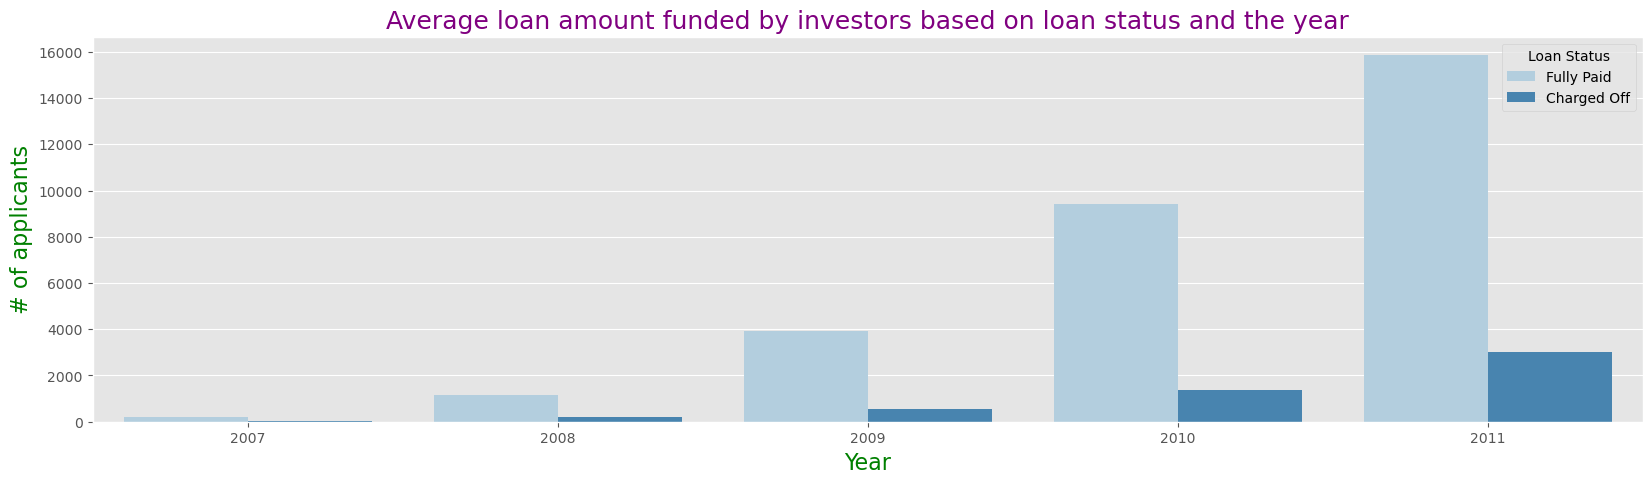

In [88]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status and the year",
          fontdict={'fontsize':18,'fontweight':5,'color':'Purple'})

sns.countplot(data=inp4, x='Year',hue='loan_status',palette='Blues')

plt.ylabel("# of applicants",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Year",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

**Observation**<br>
Maximum loans that were defaulted was in the year 2011 and the least was in the year 2007. The exact same behavior exists
also for the those loans that were Fully paid.<br>

**Action**<br>
Continue this analysis by comparing the months in the year 2011. Also check how many applicants were present in each of these years.

In [89]:
inp4.Year.value_counts()

2011    18861
2010    10759
2009     4504
2008     1352
2007      230
Name: Year, dtype: int64

**Observation**<br>
Maximum applicants were in year 2011 followed by 2010. This gives a partial explanation on why there are many defaults
in the year 2011.

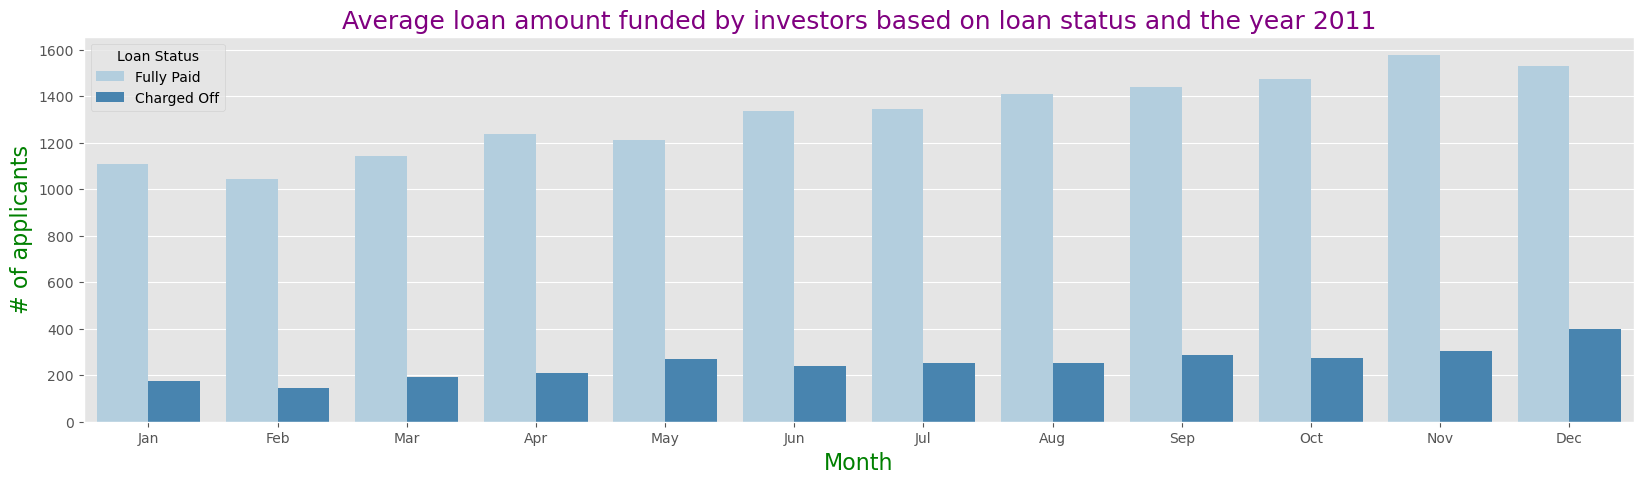

In [90]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status and the year 2011",
          fontdict={'fontsize':18,'fontweight':5,'color':'Purple'})

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.countplot(data=(inp4[inp4['Year']==2011]), x='Month', order=months,palette='Blues',hue='loan_status')

plt.ylabel("# of applicants",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Month",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

**Observation**<br>
Maximum defaults occurred in Dec 2011  and during later half of the year which are Sept, Oct & Nov and May & July during mid of the year. There is a consistency in loans that were fully paid off in the year 2011 which has maximum defaults. <br>

**Action**<br>
Continue this analysis with comparison with Annual income in the year 2011.

In [91]:
#Charged off : check whether data set has rows for all months & years
inp5.pivot_table(index = "Year",columns="Month",values="annual_inc", 
                 fill_value=0,aggfunc=np.count_nonzero ).reindex(months, axis=1)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2007,0,0,0,0,0,0,0,6,3,10,5,18
2008,31,25,39,20,2,0,0,2,1,11,31,30
2009,28,34,30,38,39,41,45,38,55,81,81,60
2010,68,53,61,73,113,152,130,135,164,146,133,131
2011,174,147,193,211,271,241,251,253,286,274,305,397


In [92]:
#Charged off : above pivot table - there are no rows for year 2007 for months Jan,Feb,Mar, Apr & May
#use pivot table to subset the data and aggregate; replace the missing data rows with 0 (see above pivot table)
inp5.pivot_table(index = "Year",columns="Month",values="annual_inc", 
                 fill_value=0,aggfunc=np.median ).reindex(months, axis=1)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2007,0,0,0.00,0.0,0,0,0,36995,96000,39000.00,75000,60000
2008,62000,58000,52000.00,57664.5,61000,0,0,61998,80000,55000.00,65004,50502
2009,62502,58865,49702.00,59053.0,47000,45000,51480,66502,50000,53360.32,50000,44070
2010,48180,48000,48000.00,51449.0,50004,53300,48000,54257,54000,45472.00,52000,55000
2011,57000,55000,52999.96,51432.0,50004,50400,54704,52000,55000,60000.00,54600,54600


In [93]:
inp4['annual_inc'].describe()

count     35706.000000
mean      61908.654033
std       28334.092272
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       79000.000000
max      149981.000000
Name: annual_inc, dtype: float64

**Observation**<br>
Majority of the applicants that defaulted had an annual income between USD 57,000 and USD 60,000 in the year 2011 which is approximately around the median for the main dataset. Annual income did not increase drastically to explain why there were so many loan applications.
Therefore continue analysis with purpose of the loan.

In [94]:
#count how many loans were applied for which purpose of the loan in the year 2011
inp4[inp4.Year == 2011].pivot_table(index = "Month",columns="purpose",values="annual_inc", 
                 fill_value=0,aggfunc=np.count_nonzero ).reindex(months,axis=0)

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Month,,,,,,,,,,,,,
Jan,54,189,673,63,11,71,27,12,80,2,55,13,34
Feb,77,146,621,67,16,63,18,8,73,2,54,12,33
Mar,101,157,610,109,20,92,22,18,79,6,72,16,35
Apr,90,173,651,147,13,93,25,20,119,6,57,17,36
May,89,145,705,146,14,102,33,21,114,3,70,19,23
Jun,82,159,731,149,10,97,27,22,164,6,57,21,53
Jul,59,167,758,143,9,92,26,32,179,2,72,19,39
Aug,57,199,823,112,10,81,28,38,162,5,87,21,41
Sep,73,192,894,117,23,86,36,25,139,8,64,15,52


**Observation**<br>
In the year 2011, maximum loans were taken for the purpose of **debt_consolidation**. <br>

*As per www.investopedia.com, Debt consolidation is the act of using a new loan to pay off older debts and liabilities. 
By combining multiple high-interest debts into one, you may be able to save money, pay lower EMIs, and manage one's 
finances better.*<br>

According to https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath, The Great Recession had bottomed
out in the middle of 2009, however the economic weakness lasted for few more years which impacted the credit conditions of US
households and resulted in historically elevated unemployment rates. This could explain why there were many defaults in later
half of the year 2011 and therefore can be attributed as a rare event.

**15. Analyse fully paid and charged off loans for different employment lengths**.<br>

*15.1 Segment on state and purpose, analysis on count of fullypaid/charged off loan amounts for different employment lengths*.<br>

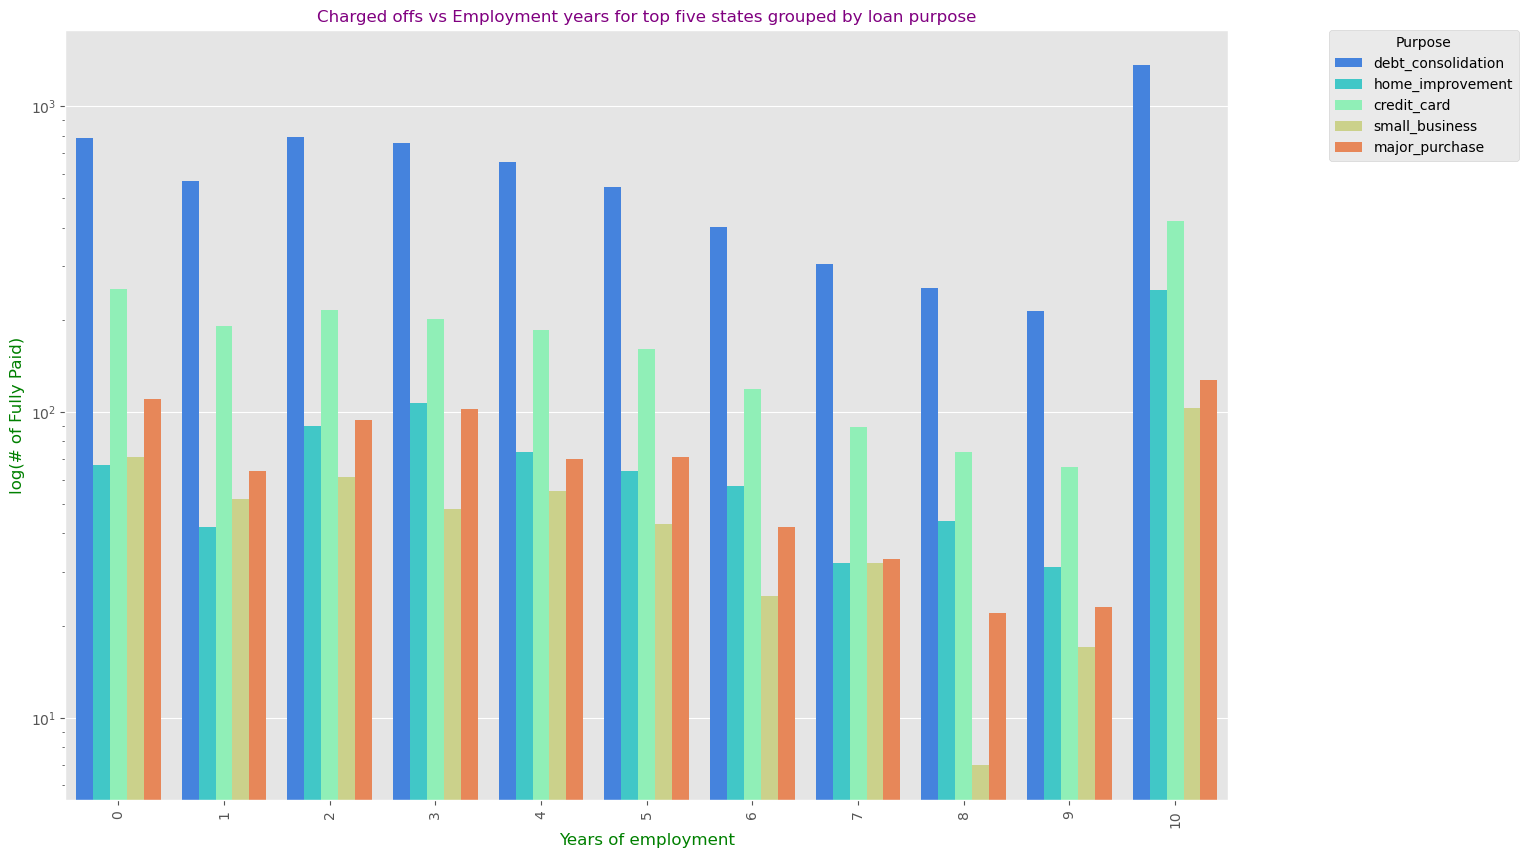

In [157]:
plt.figure(figsize=(15,10))
purpose_categories = ['debt_consolidation', 'credit_card', 'home_improvement', 'major_purchase', 'small_business']
inp6 = inp4[inp4['addr_state'].isin(['CA', 'NY', 'FL','TX', 'NJ'])]
inp6 = inp6[inp6['purpose'].isin(purpose_categories)]
inp6 = inp6[inp6['loan_status'] =='Fully Paid']
plt.title("Charged offs vs Employment years for top five states grouped by loan purpose",
          fontdict={'fontsize':12,'fontweight':5,'color':'Purple'})
sns.countplot(data=inp6, x=inp6['emp_length'], hue='purpose', palette = "rainbow")

plt.legend(title='Purpose',bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.ylabel("log(# of Fully Paid)",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Years of employment",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.yscale("log")
plt.xticks(rotation=90)

plt.show()  

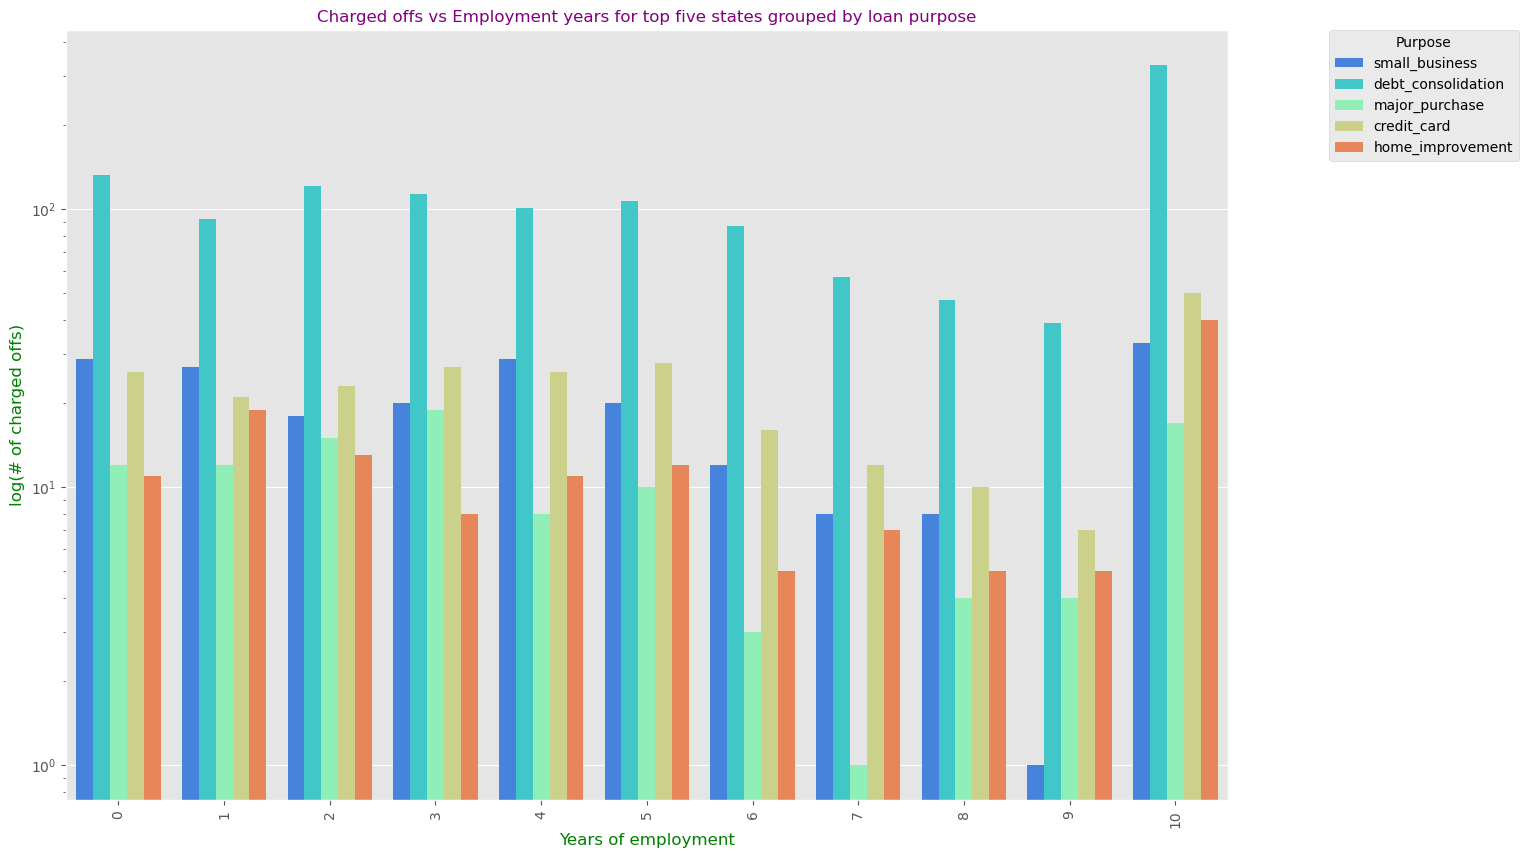

In [158]:
plt.figure(figsize=(15,10))

inp7 = inp4[inp4['addr_state'].isin(['CA', 'NY', 'FL','TX', 'NJ'])]
inp7 = inp7[inp4['purpose'].isin(purpose_categories)]
inp7 = inp7[inp7['loan_status'] =='Charged Off']
plt.title("Charged offs vs Employment years for top five states grouped by loan purpose",
          fontdict={'fontsize':12,'fontweight':5,'color':'Purple'})
sns.countplot(data=inp7, x=inp7['emp_length'], hue='purpose', palette = "rainbow")
plt.legend(title='Purpose',bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.ylabel("log(# of charged offs)",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Years of employment",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.yscale("log")
plt.xticks(rotation=90)

plt.show()  

**Observation**<br>
1. Charged offs are maximum for applicants with employment years greater than or equal to 10. <br>
2. Debt consolidation is the major contributer across different employment lengths.

*15.2 Analysis the count of fully paid/charged off loan amounts for different employment lengths*.

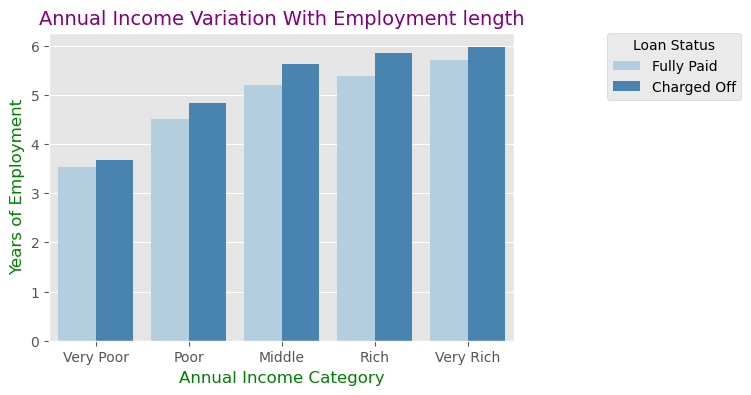

In [122]:
# employment length vs employmenty length
plt.figure(figsize=(6,4))
plt.title("Annual Income Variation With Employment length",
          fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})
sns.barplot(data=inp4, x='annual_inc_bins',y='emp_length',hue='loan_status', palette='Blues',ci=0 ) 
plt.ylabel("Years of Employment",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Annual Income Category",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.legend(title='Loan Status',bbox_to_anchor=(1.2, 1), borderaxespad=0)
plt.show()

**Observation**<br>
1. Annual income is positively correlated with employment length. Annual income increases linearly with increse in employment years.<br>
2. In each category of annual income, the ratio od fully paid and charged off loans is almost same and not much insights can be drawn.

**16. Analyse impact of change in rate of interest with other variables**.<br>

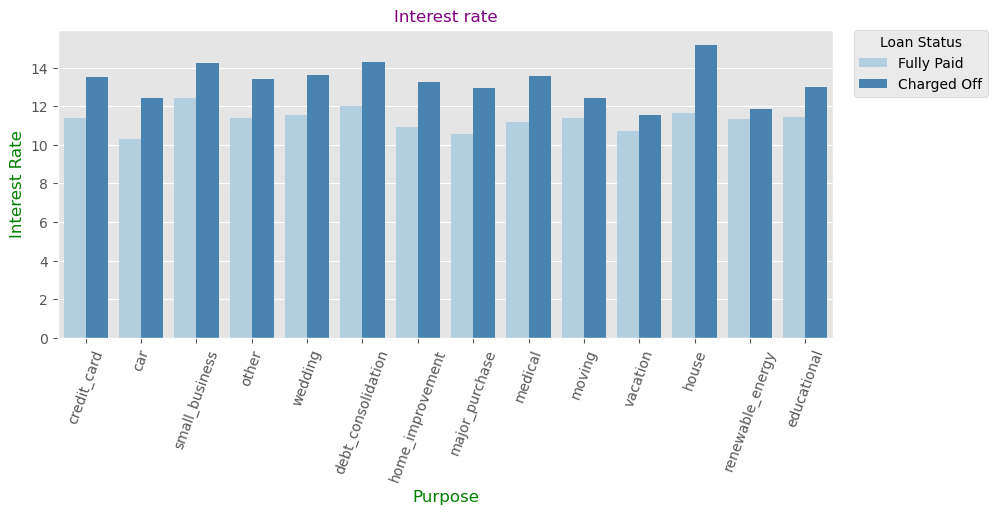

In [121]:
plt.figure(figsize=(10,4))
plt.title("Interest rate",
          fontdict={'fontsize':12,'fontweight':5,'color':'Purple'})
plt.xticks(rotation=70)
sns.barplot(data=inp4, x='purpose',y='int_rate',hue='loan_status', palette='Blues',ci=0 )
plt.ylabel("Interest Rate",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Purpose",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.legend(title='Loan Status',bbox_to_anchor=(1.2, 1), borderaxespad=0)
plt.show()

**Observation**<br>
1. Interest rate is maximum for house loan followed by small businesses and debt consolidation<br>

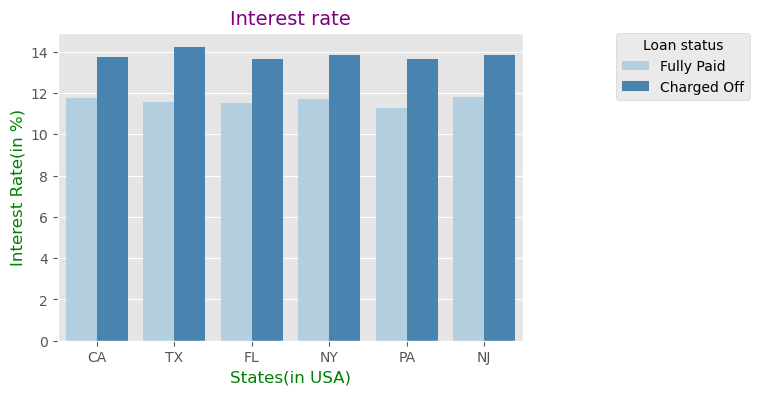

In [140]:
plt.figure(figsize=(6,4))
plt.title("Interest rate",
          fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})
inp5 = inp4[inp4['addr_state'].isin(['CA', 'NY', 'FL','TX', 'NJ', 'PA'])]
sns.barplot(data=inp5, x='addr_state',y='int_rate',hue='loan_status', palette='Blues',ci=0) 
plt.ylabel("Interest Rate(in %)",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("States(in USA)",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.legend(title='Loan status',bbox_to_anchor=(1.2, 1), borderaxespad=0)
plt.show()

**17. Analyse dti and its variation with annual income and rate of interest.**<br>

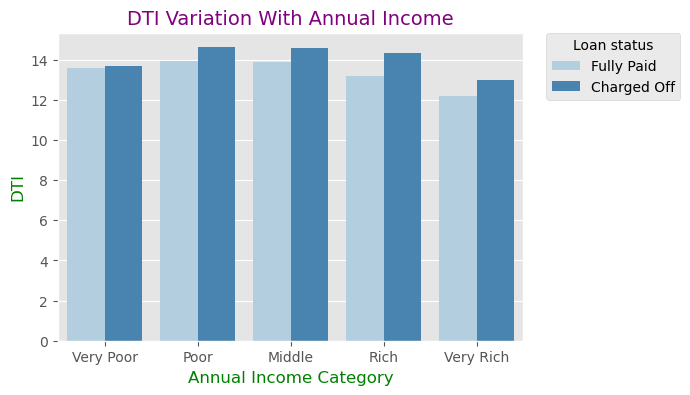

In [165]:
plt.figure(figsize=(6,4))
plt.title("DTI Variation With Annual Income",
          fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})
sns.barplot(data=inp4, x='annual_inc_bins',y='dti',hue='loan_status', palette='Blues',ci=0 ) 
plt.ylabel("DTI",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Annual Income Category",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.legend(title='Loan status',bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

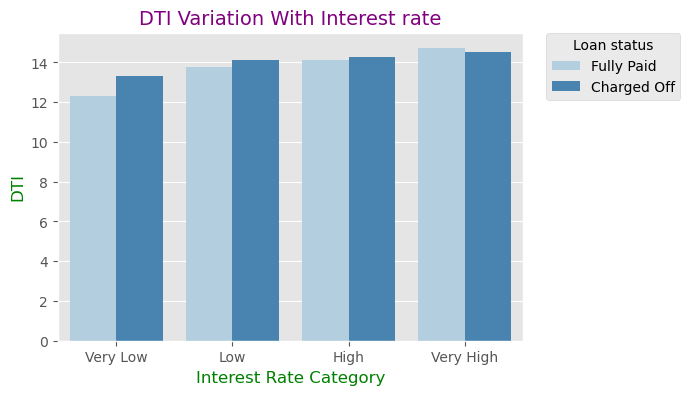

In [166]:
plt.figure(figsize=(6,4))
plt.title("DTI Variation With Interest rate",
          fontdict={'fontsize':14,'fontweight':5,'color':'Purple'})
sns.barplot(data=inp4, x='int_rate_bins',y='dti',hue='loan_status', palette='Blues',ci=0 )
plt.legend(title='Loan status',bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.ylabel("DTI",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.xlabel("Interest Rate Category",fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.show()

**Observation**<br>
1. DTI and interest rate are positively correlated. Interest rate is low for lower DTI
2. There are more loans approved for higher interest rates.
3. For very low and low interest rates/dti, number of charged off loans are greater then the fully paid loans. However, for very high interest rates, proportion of fully paid loans is more(though there are significant number of defaulters).
4. Annual income is not a good factor to analyse change in dti.

**18. Correlation of dataset**

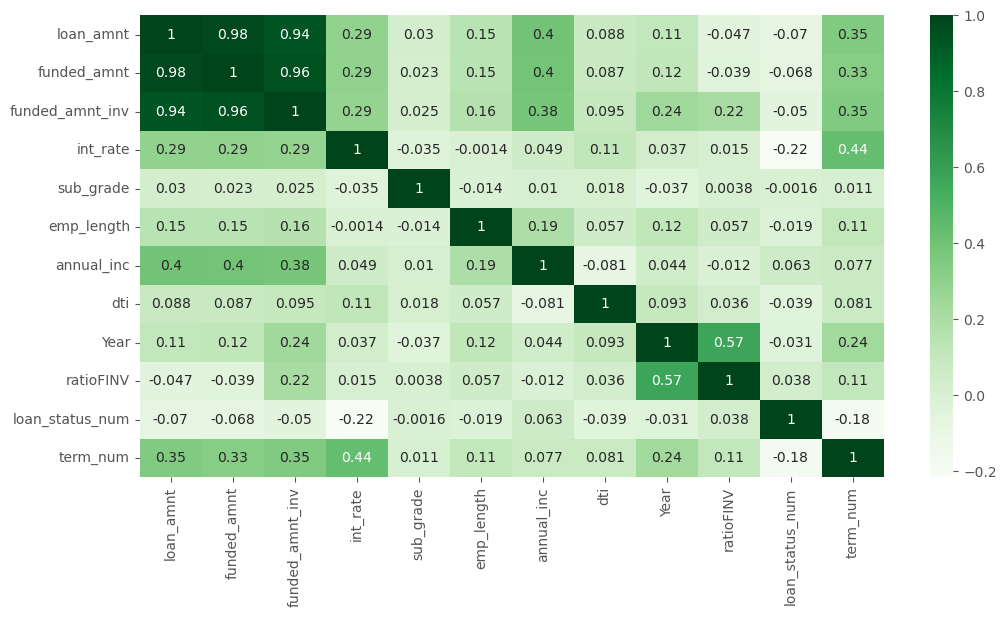

In [102]:
#build correlation heatmap; helps in further bivariate analysis
plt.figure(figsize=(12,6))
sns.heatmap(inp4.corr(), cmap="Greens",annot=True)
plt.show()

**Observation**<br>
1. High correlation between loan_amnt, funded_amnt & funded_amnt_inv.<br>
2. High correlation between interest rate and loan_amnt, funded_amnt & funded_amnt_inv. <br>
3. Good correlation between Year and ratioFINV.

**19. Relationship between funded_amnt_inv & interest rate with home ownership**

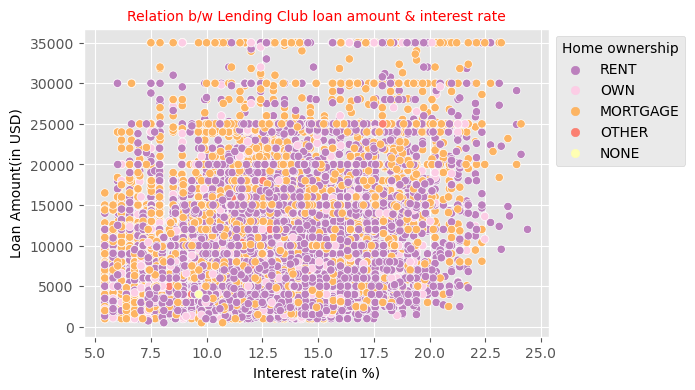

In [103]:
#Charged off
plt.figure(figsize=(6,4))

plt.title('Relation b/w Lending Club loan amount & interest rate',fontdict={'fontsize':10,'fontweight':5,'color':'Red'})
sns.scatterplot(x=inp5['int_rate'],y=inp5['funded_amnt'],hue= inp5['home_ownership'],
                palette='Set3_r' )
plt.xlabel("Interest rate(in %)")
plt.ylabel("Loan Amount(in USD)")

plt.legend(title='Home ownership',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
1. Investor sanctioned amounts around USD 35,000 mostly belong to defaulted applicants with mortgage which implies that
any applicants on mortage and with high investor funded amount tend to default on these loans.
2. Majority of the clutering of data points towards to the lower end of santioned loan amount for those applicants living
on rent. This implies that even though the loans sanctioned are for the most part low, applicants still default especially
if they live on rent.
3. A cluster of defaulted applicants owning their own residence tend to default with higher interest rates but with low to 
middle sanctioned loan amounts.

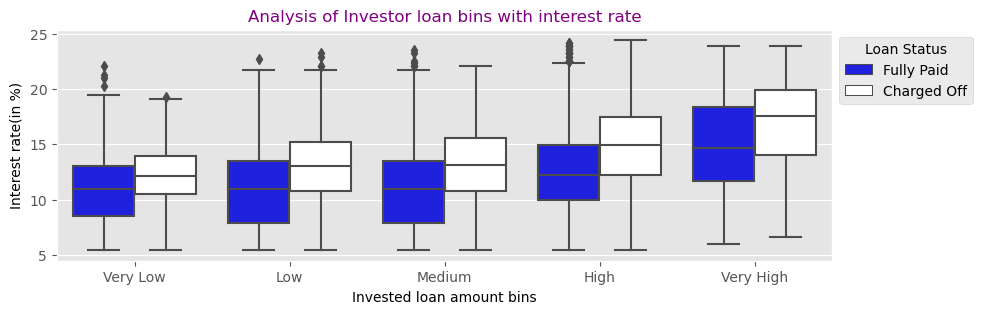

In [104]:
#boxplot of invested loan amount bins with interest rates
plt.figure(figsize=(10,3))
plt.title('Analysis of Investor loan bins with interest rate',fontdict={'fontsize':12,'fontweight':5,
                                                                                 'color':'Purple'})
sns.boxplot(inp4, x=inp4.funded_amnt_inv_bins, hue='loan_status', y=inp4.int_rate, palette='flag_r')
plt.xlabel('Invested loan amount bins')
plt.ylabel('Interest rate(in %)')
plt.legend(title='Loan Status',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
1. Behavior similar to boxplot of annual income classfication & interest rate.
2. Defaults happen for high interest rates for all bins.
3. There is an increasing trend of interest rate against the increasing loan amount bins.
4. Outliers are present only for Fully paid loans where the interest rates are very high ie above 20% except for Very High income applicants. Only Very Low & Low income defaulted applicants have outliers.
5. Median interest rate for fully paid applicants falls in the range between 10%-15%.
6. Median interest rate for defaulted applicants falls in same range, except for Very high which is closer to 18%.

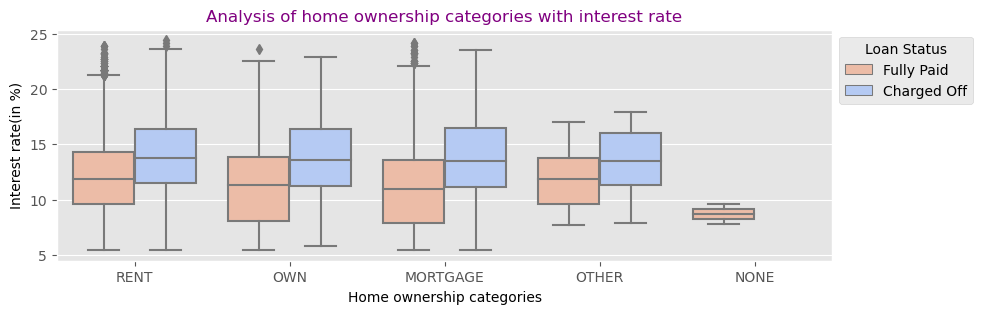

In [105]:
#boxplot of invested loan amount bins with interest rates
plt.figure(figsize=(10,3))
plt.title('Analysis of home ownership categories with interest rate',fontdict={'fontsize':12,'fontweight':5,
                                                                                 'color':'Purple'})
sns.boxplot(inp4, x=inp4.home_ownership, hue='loan_status', y=inp4.int_rate, palette='coolwarm_r')
plt.xlabel('Home ownership categories')
plt.ylabel('Interest rate(in %)')
plt.legend(title='Loan Status',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
1. There is no data for defaulted applicants whose home ownership is unknown. Since the fully paid applicants are very less,
this can be ignored. 
2. The range of interest rate is within 8%-16% for all categories of home ownership, however defaulted applicants have 
a median interest rate of around 14% which is on a higher side in comparison with fully paid applicants who have it around
11%-12%.
3. Outliers exist for those on rent & paying mortgage with very high interest rates though a majority of them are for those
who have paid their loans fully.
4. Only outlier for defaulted applicants are for those living on rent with a very high interest rate above 24%.
5. Boxplot for charged off are similar for all categories, however for fully paid, applicants on mortgage or owning their 
own homes are the largest which implies that this applicants get a wide range of interest rates compared to those living on 
rent or other types of accomodation(perhaps business offices/factories).

**Conclusion**<br>
1. Interest rates are higher for defaulted applicants on average when compared with categories of home ownership & the range of 
investor funded loan amounts.
2. This implies that higher the loan amount that is sanctioned, higher is the interest rate. 
3. Those who own their own house or have mortgage are offered a wide range of interest rates between 8%-16% and default
around the median of interest rates at 14%.
4. Applicants on rent have a smaller range of interest rates of 9.5%-16% & default around the median of interest rates at 
14%.
5. Widest range of interest rates are offered to Very high sanctioned loan amounts applicants with range 12%-20% and default
around the median of interest rate of 18%.


**20. analysis of annual income bins with purpose & interest rate**

In [106]:
#pick top purposes that can be analysed
inp4.purpose.value_counts().head(5)

debt_consolidation    16971
credit_card            4669
other                  3536
home_improvement       2494
major_purchase         1973
Name: purpose, dtype: int64

In [107]:
#new data set to focus on 3 loan purposes for charged off 
inp6 = inp5[inp5.purpose.isin(['debt_consolidation','credit_card','home_improvement'])]
inp6.shape

(11984, 25)

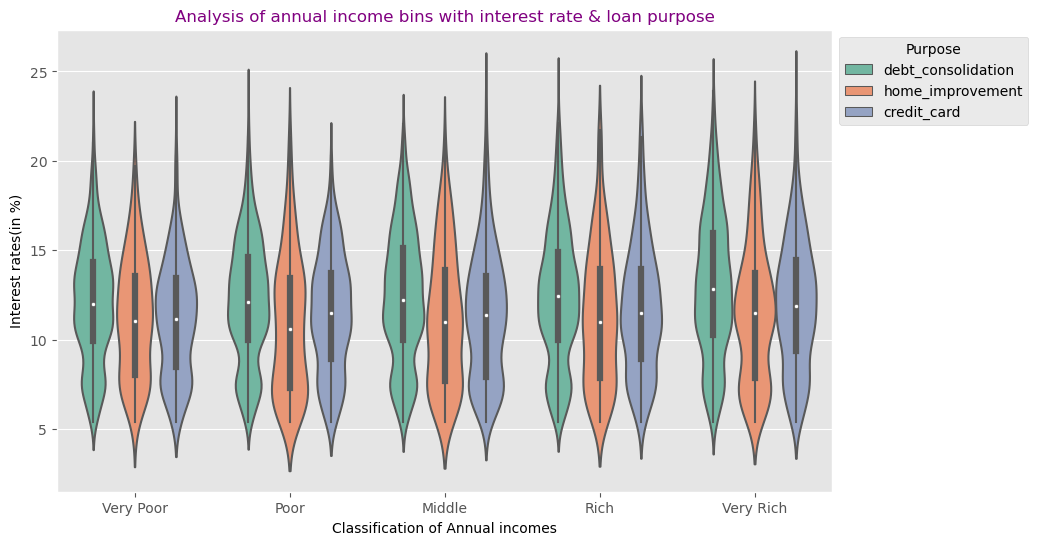

In [108]:
#violin plot
plt.figure(figsize=(10,6))
plt.title('Analysis of annual income bins with interest rate & loan purpose',fontdict={'fontsize':12,'fontweight':5,
                                                                                 'color':'Purple'})
sns.violinplot(data = inp6, x='annual_inc_bins', y ='int_rate', hue='purpose' ,palette = "Set2")
plt.xlabel('Classification of Annual incomes')
plt.ylabel('Interest rates(in %)')
plt.legend(title='Purpose',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation**<br>
1. Median interest rate for debt consolidation is the highest(around 15%) for Rich & Very Rich defaulted applicants.
2. Median interest rate for debt consolidation is lowest(around 13%) for Very poor defaulted applicants.
3. Very rich defaulted applicants tend to default more with credit card loans with an interest rate between 14.5%-15%.
4. For the rich defaulted applicants, it is mostly for credit card followed by home improvement loans. This is similar for
those in middle & poor income classifications.
5. For the very poor defaulted applicants, they tend to default with lower interest rate(around 13%) for credit cards and 
more so for home improvement with higher interest rates (around 14%).

## Observations

Profile of **defaulted applicants** typically contain following indicators:<br>

**1. Home ownership**<br>
> 1.1 Applicants lives on **rent** or are paying **mortgage**.<br>
> 1.2 Applicants tend to be accept **interest rates** around **14%**.<br>
> 1.3 Applicants living on **rent** and with **interest rate** above **25%** most likely always defaults.<br>

**2. Grade & sub-grade**<br>
> 2.1 **Very rich** applicant will most likey default with **grade G** at an **interest rate** of **20%**.<br>
> 2.2 **Rich** applicants tend to apply & default with **grades F & G** for large number of loan applications.<br>
> 2.3 **High-Very High** sanctioned loans from investors have the highest interest rates.<br>
> 2.4 **Median** amount sanctioned loans are assigned **grades B,C & D** and are higher in applications and which have the
highest defaults resulting in the maximum credit loss for the company.<br>
> 2.5 **Very poor** & *Poor** income groups have the highest number of **median** santioned loan amounts with grades 
B(sub-grades B3,B4,B5(highest)), C(sub-grades C1,C2,C3) & D(D2,D3). They also tend to default **lesser on riskier grades** 
because of **lower interest rates**.<br>
> 2.6  Loan **sub-grade A1** has the least number of defaulted applicants which is also the least for **Very high, Poor and 
Very poor income groups**.<br>

**3. Term**<br>
> 3.1 **Very Poor** & **Poor** income groups have loan term of **36 months**.<br>
> 3.2 **Rich** & **Very Rich** income groups have loan term of **60 months**.<br>
> 3.3 Defaults happen at an interest rate of **13%** for loan term of **36 months** while it is **16%** for **60 months**.<br>
> 3.4 Loan term of **60 months** have higher interest rates.<br>

**4. Purpose**<br>
> 4.1 **Debt consolidation** has the highest defaults with interest rate at 15% in the **year 2011** & **month December** 
which may be due to after-effects of The Great Recession. This is an event that may repeat during any global event that 
affects a USA economic cycle.<br>
> 4.2 Debt consolidation defaults is high for **Very Rich** & **Rich** applicants & lowest for **Very Poor** applicants.<br>
> 4.3 **Very rich** applicants tend to default more with **credit card loans** with an interest rate between **14.5%-15%**.<br>
> 4.4 **Very Poor** applicants tend to default more with **home improvement** with higher interest rates of around **14%** 
and least with **credit card** with interest rates of around **13%**.<br>

**5. Interest rate**<br>
> 5.1 The higher the interest rate, the higher likelihood that applicant defaults.<br>
> 5.2 The higher the loan sanctioned by the investor, higher is the interest rate.<br>
> 5.3 The median of interest rate is in the **range of 10%-15%** for all income groups.<br>
> 5.4 **Very Low** & **Low** sanctioned loan amounts have very high interest rates.<br>
> 5.5 Higher the DTI, higher is the interest rate.<br>
> 5.6 Very few applicants had applied for loan with very high rate of interest and the proportion of charged off's is maximum.<br>  
> 5.7 For very low and low rate of interest, proportion of charged off's is lesser.

**6. Employment Length**<br>
> 6.1 Between 2-9 years, with increase in employment length, applicants tend to default less.<br>
> 6.2 With employment length more than or equal to 10 years, there is more likelihood that the applicant defaults.<br>
> 6.3 Debt consolidation is the major contributer for defaults across all employment lengths.<br>
> 6.4 Annual income increases with increase in employment length.<br>

**7. States**<br>
> 7.1 CA has maximum number of defaults among all US states followed by NY, FL and TX.<br>

**8. Relationship between requested, Lending club funded & investor funded loan amounts**<br>
>8.1 Investor tends to sanction the entire loan amount against the requested loans from the applicant.<br>
>8.2 The higher the income classification, higher is the loan requested from the borrower in an increasing trend. **Very Rich** applicants have the highest loans sanctioned towards them from the investor.

## Recommendations

When analysing the application of a new loan request, following are the recommendations suggested in order to avoid high 
credit loss:<br>

1. Investor may sanction a much lower loan amount against the requested loan amount for those applicants belonging to the
medium income group with sub-grade B5. <br>
2. Whenever there is an economic down-turn in USA, the investor can try to be more cautious towards those applicants who
have applied for loan requests against debt consolidation and either decide to reject the loans or reduce the sanctioned loan
amounts with an  increase in the loan terms while maintaining the same interest rates for the **very poor** & **poor** 
income groups.<br>
3. For those applicants living on rent, the investor may decide to reject those applications which would have an interest 
rate of 25% and above.<br>
4. Applicants can be offered lower interest rates for those living on rent or paying mortgage for those belonging to 
lower end of the income groups for those who apply for home improvement since they tend to repay their loans in general.<br>
5. The higher end of income groups tends to go for credit card loans of riskier grade G with high interest rates which the
investor may decide to reduce the sanctioned loan amounts and increase the term of the loan or reject in case the requested 
loan amounts are significantly high. <br>
6. Care to be taken when lower income applicants apply for loans that qualify under grades B, C & D due to high defaults.
The investor may decide to either reduce the interest rate or sanction lower loan amounts.<br>
7. In general, if a loan applicant is against debt consolidation or credit card esp from the higher income groups, care may
be taken to reject them or to reduce interest rates or sanction lower loan amounts.<br>
